# **Project Name**    -



##### **Project Type**    - NETFLIX_MOVIES_AND_TV_SHOWS
##### **Contribution**    - Priya Saxena

# **Project Summary -**

Netflix, a subscription-driven streaming service celebrated for its extensive collection of movies and TV shows, utilizes sophisticated data analysis and machine learning methods to amplify user engagement and alleviate subscriber turnover challenges. The sheer scale of the content library poses a difficulty for users in discovering content tailored to their preferences. In response, Netflix employs data-centric strategies, including clustering, to categorize titles based on diverse characteristics like genre, cast, and plot.

This project centers around a thorough examination of Netflix's content repository, utilizing data sourced from the Flixable search engine. With a subscriber base exceeding 220 million as of Q2 2022, the goal is to craft meaningful clusters that not only enhance user engagement but also play a role in diminishing subscriber churn.

An essential first step involves addressing null values in the dataset. Subsequently, Exploratory Data Analysis (EDA) is conducted to extract insights aimed at thwarting subscriber churn. Attributes such as director, cast, country, genre, rating, and description undergo tokenization, preprocessing, and vectorization using the TF-IDF vectorizer to streamline clustering.

To bolster performance, Principal Component Analysis (PCA) is employed for dimensionality reduction. Following this, K-Means Clustering and Agglomerative Hierarchical Clustering algorithms come into play. Optimal cluster numbers, discerned through diverse evaluation methods, are pinpointed at 4 for K-Means and 2 for hierarchical clustering.

In the concluding phase, a content-based recommender system takes shape. Leveraging a cosine similarity matrix, personalized recommendations are generated to cater to individual user preferences, ultimately leading to a reduction in subscriber churn for Netflix. This all-encompassing approach seamlessly integrates data analysis, machine learning, and recommendation systems to optimize the streaming experience for Netflix's expansive subscriber base.

# **GitHub Link -**

https://github.com/piyaSaxena04/NETFLIX_MOVIES_AND_TV_SHOWS_CLUSTERING-By-priya-Saxena-

# **Problem Statement**


This dataset encompasses TV shows and movies accessible on Netflix as of 2019, sourced from Flixable, a third-party Netflix search engine. Notably, a 2018 report from Flixable revealed a substantial surge in the number of Netflix TV shows, nearly tripling since 2010. Concurrently, the count of movies on the streaming service has declined by over 2,000 titles since 2010. This dataset provides an intriguing opportunity to unearth additional insights.

Moreover, integrating this dataset with external data sources like IMDB ratings and Rotten Tomatoes could yield further compelling findings.

The objectives of this project include:

1. Conducting Exploratory Data Analysis (EDA) to comprehend the types of content available across various countries.
2. Investigating whether Netflix has been progressively prioritizing TV shows over movies in recent years.
3. Employing clustering techniques to group similar content based on matching text-based features.

This project promises to unveil valuable insights into Netflix's content evolution and preferences, shedding light on the platform's strategic focus and potential correlations with external rating systems.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [100]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
import datetime as dt
from scipy import stats
from wordcloud import WordCloud,STOPWORDS
import string
string.punctuation
from nltk.corpus import stopwords
import nltk
nltk.download('punkt')
import re
nltk.download('stopwords')
from nltk.stem import WordNetLemmatizer
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import silhouette_score

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

### Dataset Loading

In [ ]:
# Load Dataset
n_data = pd.read_csv('/content/drive/MyDrive/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv')

### Dataset First View

In [ ]:
# Dataset First Look
n_data.head()

### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
n_data.shape

### Dataset Information

In [ ]:
# Dataset Info
n_data.info()

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
len(n_data[n_data.duplicated()])

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
n_data.isnull().sum()

In [ ]:
n_data.isnull().sum()/ len(n_data)*100

In [ ]:
# Visualizing the missing values
missing_values = n_data.isnull()
plt.figure(figsize = (6,6))
sns.heatmap(missing_values,cmap = 'coolwarm',cbar=False,yticklabels=False)
plt.title('Missing values')
plt.show()

### What did you know about your dataset?

Within the provided dataset, there are 12 columns and 7787 rows. Some values within the dataset are missing.

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
n_data.columns

In [ ]:
# Dataset Describe
n_data.describe(include='all')

### Variables Description

1. **show_id:** A unique identifier assigned to each movie or TV show.

2. **type:** Indicates whether the entry pertains to a movie or a TV show.

3. **title:** The name of the movie or TV show.

4. **director:** The name(s) of the director(s) associated with the movie or TV show.

5. **cast:** The names of actors and actresses featured in the movie or TV show.

6. **country:** The country or countries where the movie or TV show was produced.

7. **date_added:** The date when the movie or TV show was added to Netflix.

8. **release_year:** The year when the movie or TV show was originally released.

9. **rating:** The TV or movie rating assigned to the movie or TV show.

10. **duration:** The length of the movie in minutes or the number of seasons for TV shows.

11. **listed_in:** Categories or genres to which the movie or TV show belongs.

12. **description:** A concise synopsis or summary providing an overview of the movie or TV show.

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
for i in n_data.columns.tolist():
  print("Unique values in",[i],"is",n_data[i].nunique())

## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Write your code to make your dataset analysis ready.
dataset = n_data.copy()

In [ ]:
dataset.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

In [ ]:
dataset[['director','cast']] = dataset[['director','cast']].fillna("Unknown")
dataset['country'].fillna(value = dataset['country'].mode()[0],inplace=True)
dataset['rating'].fillna(value = dataset['rating'].mode()[0],inplace=True)

In [ ]:
dataset.dropna(subset=['date_added'],inplace=True)

In [ ]:
dataset.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [ ]:
dataset["date_added"] = pd.to_datetime(dataset['date_added'])
dataset['day_num'] = dataset['date_added'].dt.day
dataset['year_num'] = dataset['date_added'].dt.year
dataset['month_num']=dataset['date_added'].dt.month
dataset['Month'] = dataset['date_added'].dt.month_name()
dataset['year_num'].astype(int);
dataset['day_num'].astype(int);

In [ ]:
dataset.drop('date_added', axis=1, inplace=True)

In [ ]:
dataset['country'] = dataset['country'].apply(lambda x: x.split(',')[0])
dataset['listed_in'] = dataset['listed_in'].apply(lambda x: x.split(',')[0])
dataset['duration'] = dataset['duration'].apply(lambda x: int(x.split()[0]))

In [ ]:
ratings = {
    'TV-PG': 'Older Kids',
    'TV-MA': 'Adults',
    'TV-Y7-FV': 'Older Kids',
    'TV-Y7': 'Older Kids',
    'TV-14': 'Teens',
    'R': 'Adults',
    'TV-Y': 'Kids',
    'NR': 'Adults',
    'PG-13': 'Teens',
    'TV-G': 'Kids',
    'PG': 'Older Kids',
    'G': 'Kids',
    'UR': 'Adults',
    'NC-17': 'Adults'
}
dataset['target_ages'] = dataset['rating'].replace(ratings)

In [ ]:
dataset['type'] = pd.Categorical(dataset['type'])
dataset['target_ages'] = pd.Categorical(dataset['target_ages'], categories=['Kids', 'Older Kids', 'Teens', 'Adults'])

In [ ]:
dataset.head(3)

,show_id,type,title,director,cast,country,release_year,rating,duration,listed_in,description,day_num,year_num,month_num,Month,target_ages
0,s1,TV Show,3%,Unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020,TV-MA,4,International TV Shows,In a future where the elite inhabit an island ...,14,2020,8,August,Adults
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016,TV-MA,93,Dramas,After a devastating earthquake hits Mexico Cit...,23,2016,12,December,Adults
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2011,R,78,Horror Movies,"When an army recruit is found dead, his fellow...",20,2018,12,December,Adults


### What all manipulations have you done and insights you found?

Following the resolution of missing values in the dataset, I introduced additional columns named day_num, month_num, year_num, and target_ages.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

In [ ]:
# Chart - 1 visualization code
dataset['type'].value_counts()

Movie      5377
TV Show    2400
Name: type, dtype: int64

In [ ]:
Movies_len = dataset[dataset['type'] == 'Movie'].shape[0]
TV_Shows_len = dataset[dataset['type'] == 'TV Show'].shape[0]

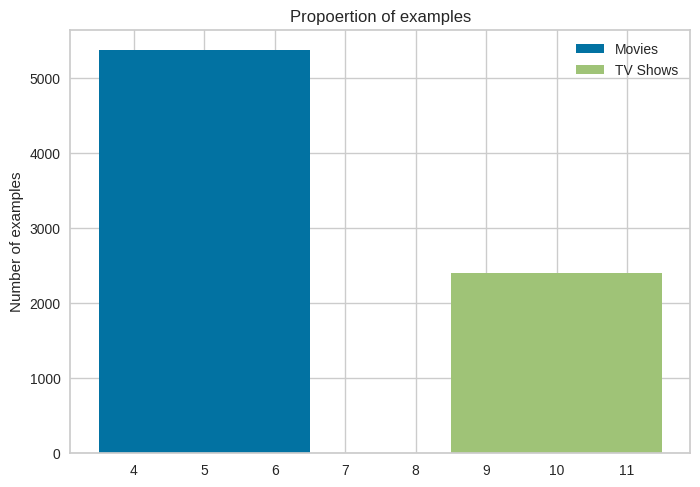

In [ ]:
plt.bar(5,Movies_len,3,label="Movies")
plt.bar(10,TV_Shows_len,3,label="TV Shows")
plt.legend()
plt.ylabel('Number of examples')
plt.title('Propoertion of examples')
plt.show()

##### 1. Why did you pick the specific chart?

Bar plots serve as effective tools for illustrating the frequency or count of categorical variables. They aid in comprehending the distribution of various categories, enabling straightforward comparisons by visually representing their respective heights or lengths within a dataset.

##### 2. What is/are the insight(s) found from the chart?

Within the 'type' column, the dataset comprises two categories: Movies and TV Shows. The distribution reveals a prevalence of Movies over TV Shows, indicating that the dataset contains a higher number of movies compared to TV shows.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Certainly, it appears that Netflix is prioritizing movies over TV shows. This strategic choice may involve a decision to allocate increased resources to the production and acquisition of movies, potentially aimed at attracting a broader audience and expanding their subscriber base.

#### Chart - 2

In [ ]:
# Chart - 2 visualization code
Country_df = dataset['country'].value_counts().reset_index()
Country_df.rename(columns = {'index': 'Country_Name'}, inplace=True)
Country_df.rename(columns = {'country': 'Count'}, inplace=True)

<Axes: title={'center': 'Top 5 country Name'}, xlabel='Country_Name', ylabel='Count'>

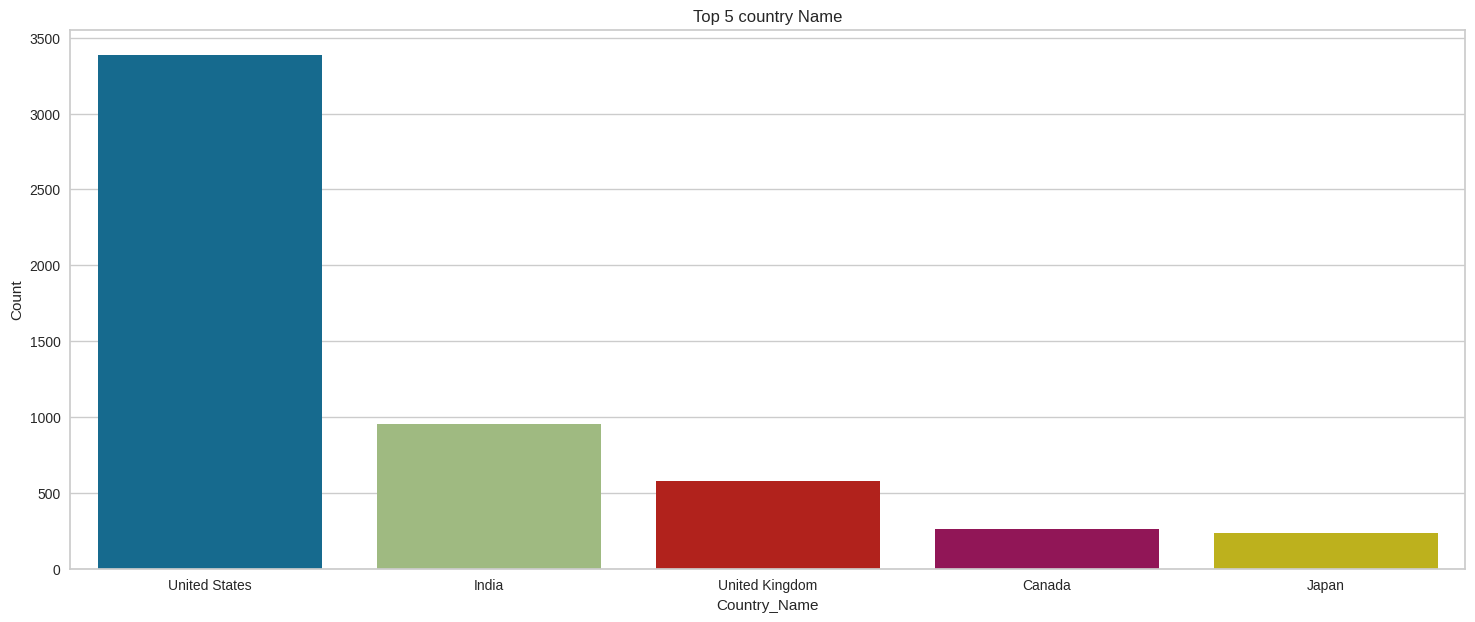

In [ ]:
plt.figure(figsize=(18,7))
plt.title('Top 5 country Name')
sns.barplot(x='Country_Name',y='Count',data=Country_df[:5])

##### 1. Why did you pick the specific chart?

"I utilized a bar plot to visually represent the top 5 countries with the highest number of movies and TV shows in the dataset. Bar plots are effective for illustrating the frequency or count of categorical variables, facilitating a clear understanding of the distribution across different categories. They enable straightforward comparisons between these categories by depicting their respective frequencies or counts within the dataset."

##### 2. What is/are the insight(s) found from the chart?

The dataset highlights that the countries with the highest number of movies and TV shows are USA, India, UK, Canada, and Japan.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Certainly, leveraging the insights gained, Netflix could strategically enhance its business. Given the larger audience in India compared to America and other countries, there is potential for Netflix to focus on expanding its operations in India, thereby tapping into a substantial market and increasing its profitability.

#### Chart - 3

In [ ]:
# Chart - 3 visualization code
tv_show_visualization = dataset[dataset['type']== 'TV Show' ]

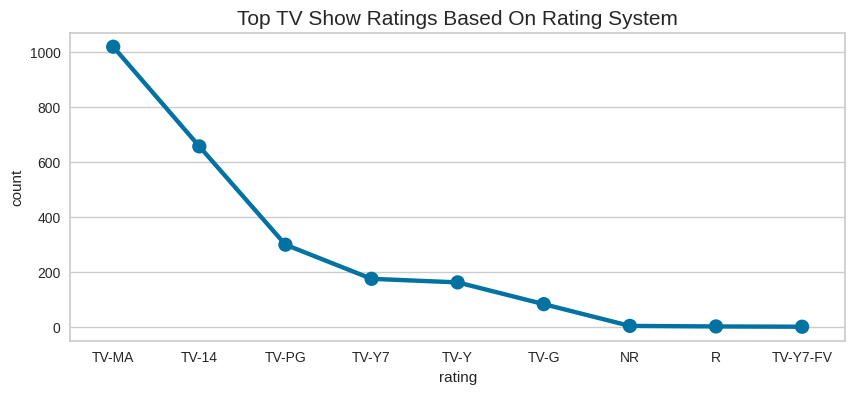

In [ ]:
tv_ratings = tv_show_visualization.groupby(['rating'])['show_id'].count().reset_index(name = 'count').sort_values(by = 'count', ascending = False)
fig_dims = (10,4)
fig, ax = plt.subplots(figsize=fig_dims)
sns.pointplot(x='rating',y='count',data=tv_ratings)
plt.title('Top TV Show Ratings Based On Rating System',size='15')
plt.show()

##### 1. Why did you pick the specific chart?

I opted for the point plot chart as it adeptly showcases the distribution of ratings. This chart type facilitates a straightforward comparison of ratings between various categories, such as movies and TV shows, by presenting individual data points and emphasizing discernible trends.

##### 2. What is/are the insight(s) found from the chart?

It provides insights into popular rating ranges and potential trends across different categories, offering a visual representation of the relationships and patterns within the dataset.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Absolutely, armed with this valuable information about the preferred TV show categories, Netflix can strategically plan content creation. By aligning their offerings with the interests of their audience, they have the potential to boost viewership and subsequently increase revenue. This data-driven approach enables Netflix to cater more precisely to the preferences of their subscribers, enhancing the overall user experience.

#### Chart - 4

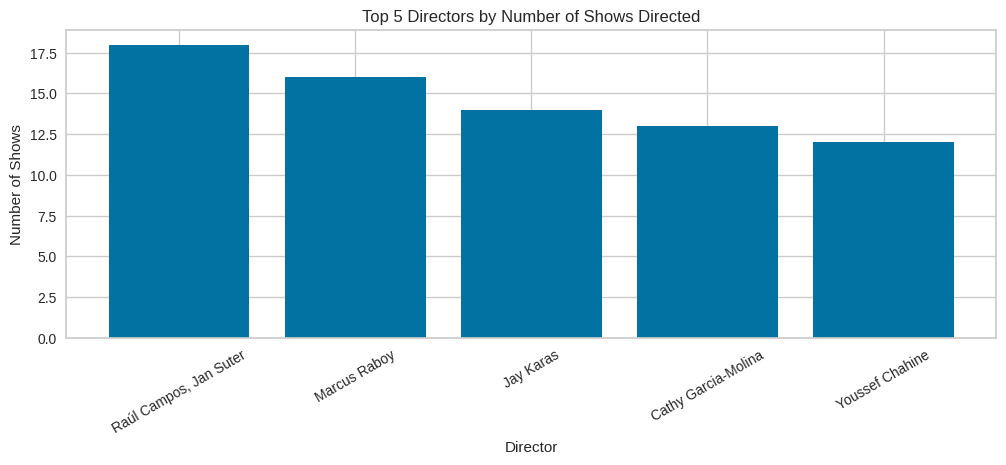

In [ ]:
# Chart - 4 visualization code
Top5_directors = dataset.loc[dataset['director'] != 'Unknown', 'director'].value_counts().nlargest(5)
plt.figure(figsize=(12,4))
plt.bar(Top5_directors.index, Top5_directors.values)
plt.title('Top 5 Directors by Number of Shows Directed')
plt.xlabel('Director')
plt.ylabel('Number of Shows')
plt.xticks(rotation=30)
plt.show()

##### 1. Why did you pick the specific chart?

I employed a bar plot to examine the top 5 directors based on the number of shows they have directed. This visualization provides a clear and concise representation of the directors with the highest counts of directed shows in the dataset.

##### 2. What is/are the insight(s) found from the chart?

The top 5 directors by the number of shows directed are as follows:

1. Raul Campos and Jan Suter, both directing 18 shows.
2. Marcus Raboy, directing 16 shows.
3. Jay Karas, overseeing almost 14 shows.
4. Cathy Garcia-Molina, directing 13 shows.
5. Youssef Chahine, with 12 shows directed.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Certainly, leveraging these insights allows for strategic recommendations of movies and shows directed by the top directors to the audience. This targeted approach can enhance user engagement and satisfaction, potentially leading to increased viewership and, consequently, generating profit for the platform. Recommending content from prolific directors aligns with user preferences and strengthens the overall content strategy.

#### Chart - 5

In [ ]:
# Chart - 5 visualization code
Month_df = dataset['Month'].value_counts().reset_index()
Month_df.rename(columns = {'index': 'Month_Name'}, inplace=True)
Month_df.rename(columns = {'Month': 'Count'}, inplace=True)

<Axes: title={'center': 'Top 5 Month Name'}, xlabel='Month_Name', ylabel='Count'>

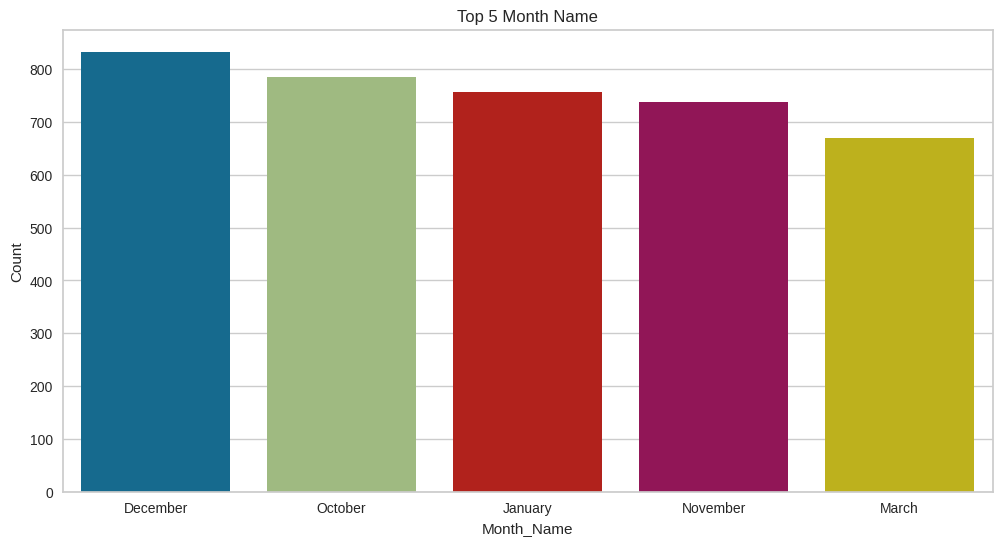

In [ ]:
plt.figure(figsize=(12,6))
plt.title('Top 5 Month Name')
sns.barplot(x='Month_Name',y='Count',data=Month_df[:5])

##### 1. Why did you pick the specific chart?

Bar plots serve as highly effective tools for visually representing the frequency or count of categorical variables. They play a crucial role in comprehending the distribution of diverse categories within a dataset, facilitating easy and intuitive comparisons. By depicting the respective heights or lengths associated with each category, bar plots provide a clear and concise means of visualizing the relationships and patterns inherent in the data.

##### 2. What is/are the insight(s) found from the chart?

The top 5 months with the highest number of movie launches on Netflix are December, October, January, November, and March.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, this data indicates that movies are often launched during these months, possibly because they are peak months.

#### Chart - 6

In [ ]:
# Chart - 6 visualization code
rating_df = dataset['rating'].value_counts().reset_index()
rating_df.rename(columns = {'index': 'rating_Netflix'}, inplace=True)
rating_df.rename(columns = {'rating': 'Count'}, inplace=True)

<Axes: title={'center': 'Top 5 rating Movies and TV shows'}, xlabel='rating_Netflix', ylabel='Count'>

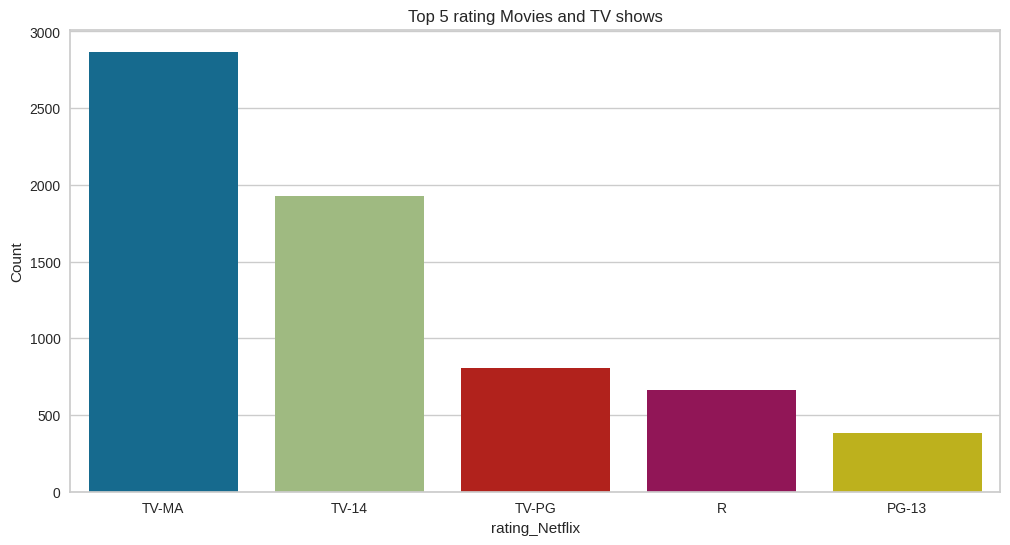

In [ ]:
plt.figure(figsize=(12,6))
plt.title('Top 5 rating Movies and TV shows')
sns.barplot(x='rating_Netflix',y='Count',data=rating_df[:5])

##### 1. Why did you pick the specific chart?

Barplots prove to be highly effective in illustrating the frequency or count of categorical variables. They provide a visual representation that aids in comprehending the distribution of diverse categories, enabling straightforward comparisons between different groups. By displaying the respective heights or lengths for each category, barplots offer a clear and concise means of visually comparing and contrasting various elements within a dataset.

##### 2. What is/are the insight(s) found from the chart?

TV-MA, TV-14, and TV-PG are my top three categories in terms of highest ratings.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Absolutely, with these insights, there's an opportunity to strategically focus on the identified categories. By directing attention and resources towards these popular categories, a platform can tailor its content offerings to better align with user preferences, potentially leading to increased engagement and satisfaction. This targeted approach can contribute to more effective content curation and audience satisfaction.

#### Chart - 7

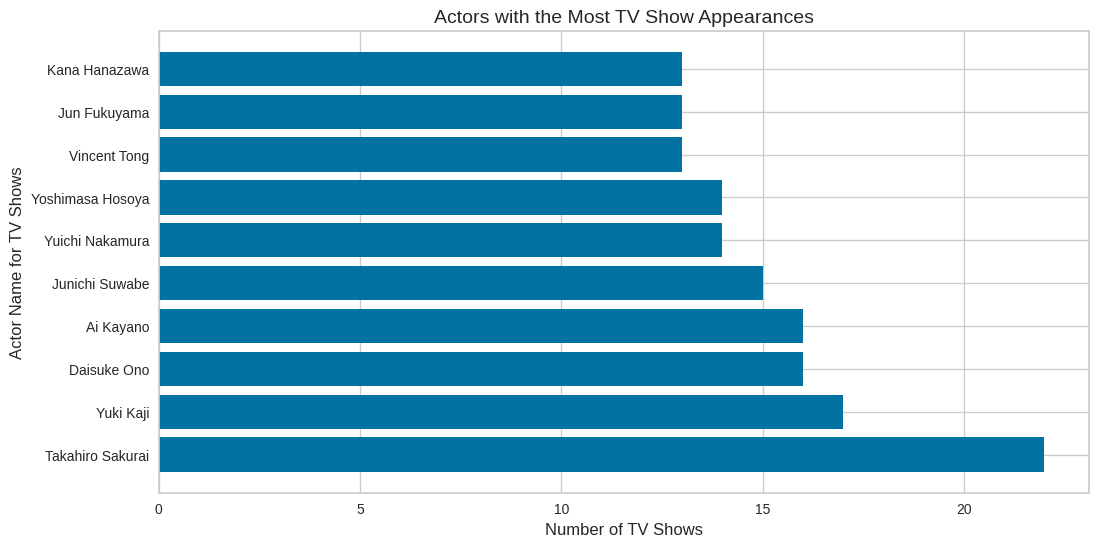

In [ ]:
# Chart - 7 visualization code
tv_shows = dataset[(dataset['type'] == 'TV Show') & ~(dataset['cast'] == 'Unknown')]
# Counting the number of TV shows each actor has appeared in
actor_counts = tv_shows['cast'].str.split(', ').explode().value_counts()
top_actors = actor_counts.head(10)
plt.figure(figsize=(12, 6))
plt.barh(top_actors.index, top_actors.values)
plt.xlabel('Number of TV Shows', fontsize=12)
plt.ylabel('Actor Name for TV Shows', fontsize=12)
plt.title('Actors with the Most TV Show Appearances', fontsize=14)
plt.show()

##### 1. Why did you pick the specific chart?

A barplot is a graphical representation that utilizes rectangular bars to visually display and compare the frequency, count, or distribution of various categories or groups within a dataset. Specifically designed for categorical data, a barplot facilitates straightforward comparisons between these categories by representing their counts or frequencies through the heights or lengths of the bars. This visual tool is particularly effective in conveying the relative magnitudes of different categories in a clear and accessible manner.

##### 2. What is/are the insight(s) found from the chart?

The chart showcases the top 10 actors with the highest number of appearances in Netflix TV shows. Notably, Takahiro Sakurai emerges with the most appearances, followed by Yuki Kaji and Daisuke Ono. These insights provide valuable information for identifying popular actors who could potentially attract audiences, offering strategic guidance for upcoming TV show releases.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Absolutely, analyzing and understanding the popularity of actors is crucial for providing targeted recommendations to the audience. Many viewers have specific preferences for actors they enjoy watching, and tailoring recommendations based on the presence of popular actors can significantly enhance user satisfaction and engagement. This data-driven approach enables platforms like Netflix to offer more personalized and appealing content suggestions to their subscribers.

#### Chart - 8

In [ ]:
# Chart - 8 visualization code
yearly_movies=dataset[dataset.type =='TV Show']['release_year'].value_counts().sort_index(ascending=False).head(15)
yearly_shows=dataset[dataset.type =='Movie']['release_year'].value_counts().sort_index(ascending=False).head(15)
total_content=dataset['release_year'].value_counts().sort_index(ascending=False).head(15)

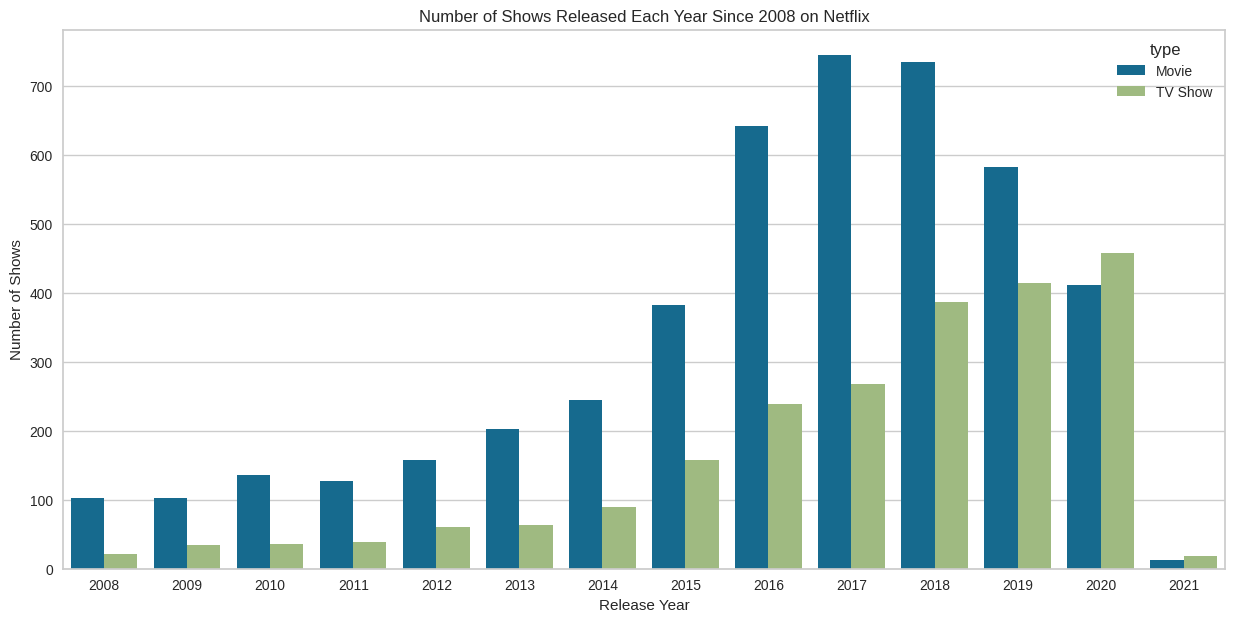

In [ ]:
yearly_growth = dataset[dataset['release_year'] >= 2008]
plt.figure(figsize=(15, 7))
sns.countplot(x='release_year', data = yearly_growth, hue='type', order=range(2008, 2022))
plt.xlabel('Release Year')
plt.ylabel('Number of Shows')
plt.title('Number of Shows Released Each Year Since 2008 on Netflix')
plt.show()

##### 1. Why did you pick the specific chart?

I aimed to examine the trend in the number of shows released each year since 2008, highlighting the variations in the releases of movies and TV shows annually. This analysis provides valuable insights into the changing landscape of content distribution over the years.

##### 2. What is/are the insight(s) found from the chart?

The annual release count for TV shows has consistently shown an upward trend since 2008. Despite occasional fluctuations, the overall trajectory has been one of growth. Additionally, there has been a noticeable widening disparity between movie and TV show releases over time. This suggests a shift in Netflix's content production strategy, indicating a greater emphasis on the creation of original movies in addition to TV shows.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Certainly, the insight that the number of shows has been consistently increasing since 2016 can have a positive impact on the business. This trend suggests a growing commitment to content production, potentially attracting more subscribers and expanding the platform's overall viewership. The continuous rise in the number of shows indicates a proactive approach by Netflix to cater to diverse audience preferences and maintain a robust content library.

#### Chart - 9

In [ ]:
# Chart - 9 visualization code
Tv_shows = dataset[dataset['type']=='TV Show']
movies = dataset[dataset['type']=='Movie']

<Axes: title={'center': 'movie ratings'}, xlabel='rating', ylabel='count'>

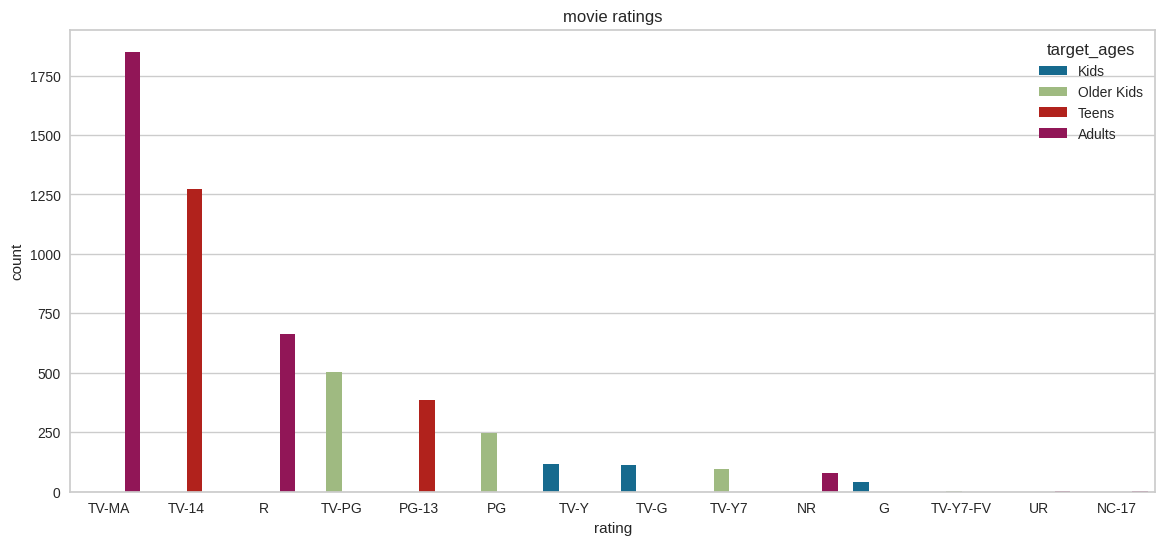

In [ ]:
plt.figure(figsize=(14,6))
plt.title('movie ratings')
sns.countplot(x=movies['rating'],hue=movies['target_ages'],data=movies,order=movies['rating'].value_counts().index)

##### 1. Why did you pick the specific chart?

Count plots are a form of visualization designed to represent the frequency or count of observations within categorical data. They offer a clear and concise way to understand the distribution of different categories and the relative prevalence of each within a dataset.

##### 2. What is/are the insight(s) found from the chart?

The lines on the chart depict movie ratings categorized by target_ages. Notably, TV-MA and TV-14 exhibit the highest ratings, aligning with content designed for adults and teens, respectively. This insight underscores the popularity and prevalence of content tailored for these specific age groups within the dataset.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Absolutely, leveraging these insights allows for targeted content recommendations to individuals in the adults and teens categories. By aligning recommendations with their preferences, platforms can keep these audiences consistently engaged, fostering user satisfaction and potentially increasing viewer retention. This strategic approach has the potential to generate profit by catering to the specific content preferences of these demographic segments.

#### Chart - 10

In [ ]:
# Chart - 10 visualization code
df_movies = dataset[dataset['type'] == 'Movie' ]

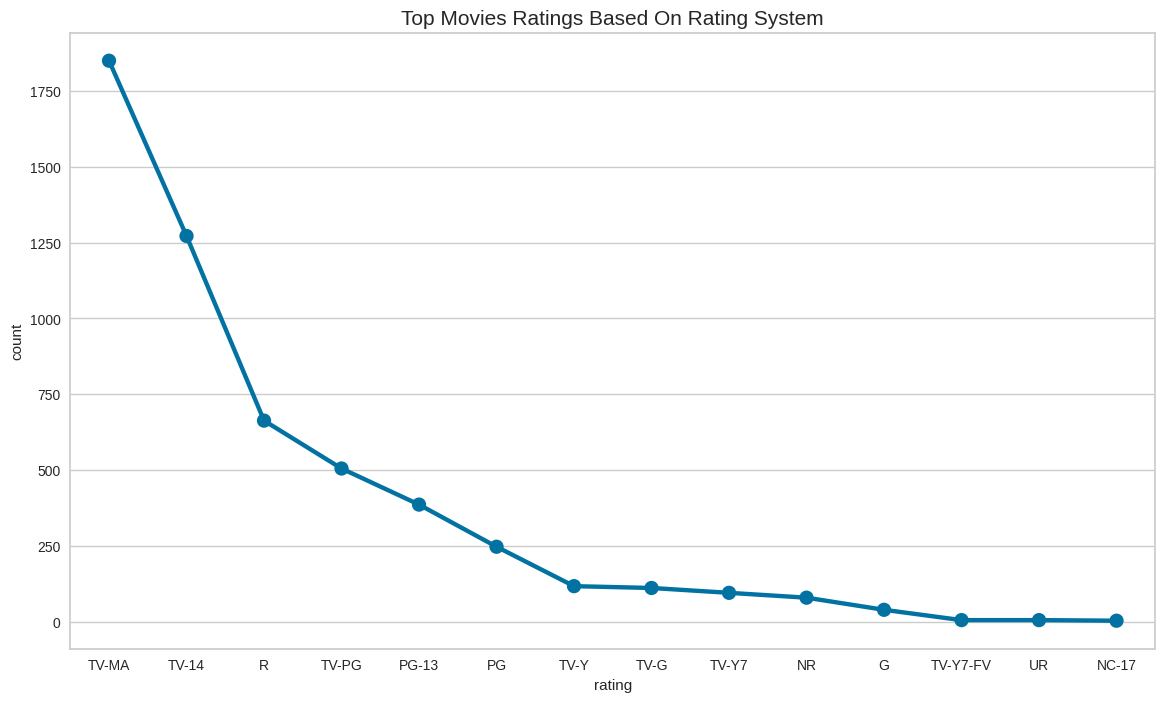

In [ ]:
tv_ratings = df_movies.groupby(['rating'])['show_id'].count().reset_index(name = 'count').sort_values(by = 'count', ascending = False)
fig_dims = (14,8)
fig, ax = plt.subplots(figsize=fig_dims)
sns.pointplot(x='rating',y='count',data=tv_ratings)
plt.title('Top Movies Ratings Based On Rating System',size='15')
plt.show()

##### 1. Why did you pick the specific chart?

Your choice of a point plot chart is well-founded, as it effectively communicates the distribution of ratings. This type of chart facilitates an effortless comparison of ratings between diverse categories, such as movies and TV shows, by presenting individual data points and emphasizing discernible trends. The clarity provided by the point plot enhances the viewer's ability to identify and interpret patterns within the data, making it a valuable tool for visualizing rating distributions across different categories.

##### 2. What is/are the insight(s) found from the chart?

Precisely, the point plot chart is instrumental in revealing popular rating ranges and potential trends between different categories. By visually representing individual data points, this chart not only highlights the distribution of ratings within each category but also allows for a quick and insightful comparison of trends across diverse groups. The visualization aids in identifying patterns, making it an effective tool for discerning the popularity and variability of ratings within the dataset.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Certainly, based on the identified trends and preferences in movie categories, platforms like Netflix can strategically plan content creation. Understanding the types of movies that audiences are inclined to watch allows for targeted and tailored content recommendations. By aligning their content strategy with user preferences, streaming services can enhance viewership, satisfaction, and, consequently, revenue. This data-driven approach provides valuable insights for optimizing content offerings and creating a more engaging user experience.

#### Chart - 11

<Axes: title={'center': 'Top10 Genre of Movies'}, xlabel='count', ylabel='listed_in'>

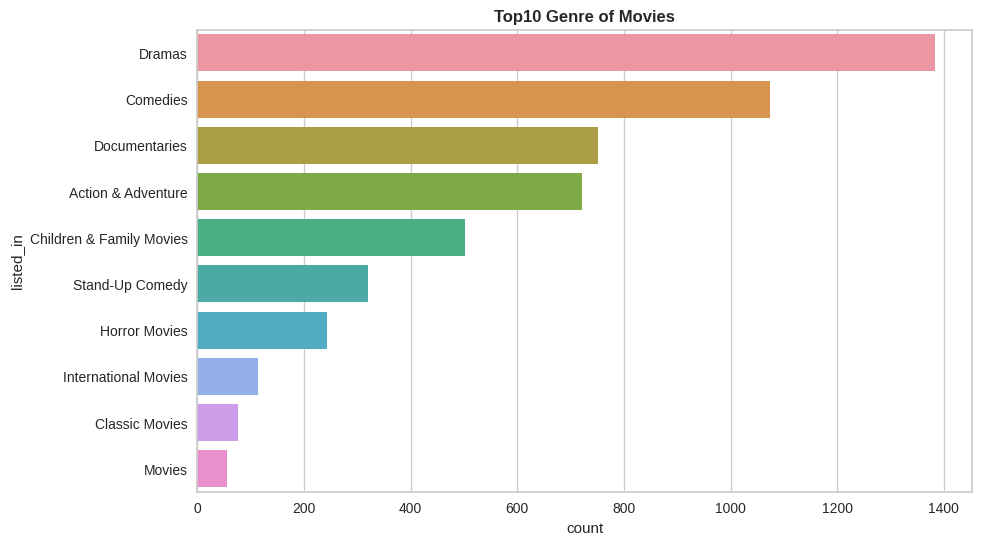

In [ ]:
# Chart - 11 visualization code
plt.figure(figsize=(10,6))
plt.title('Top10 Genre of Movies',fontweight="bold")
sns.countplot(y=movies['listed_in'],data=movies,order=movies['listed_in'].value_counts().index[0:10])

##### 1. Why did you pick the specific chart?

Indeed, a countplot is a categorical plot commonly employed in Exploratory Data Analysis (EDA) to visually represent the counts of observations within each categorical bin or category. This type of plot is particularly useful for gaining insights into the distribution of categorical data and understanding the frequency of occurrences in different categories within the dataset.

##### 2. What is/are the insight(s) found from the chart?

The top 5 genres with the highest number of movie listings are dramas, comedies, documentaries, action and adventure, and children and families. These genres dominate the movie listings, indicating their popularity and prevalence within the dataset.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Absolutely, the insight that dramas, comedies, documentaries, action and adventure, and children and families are the top genres can significantly impact the business positively. It indicates a strong preference among viewers for content in these genres. Leveraging this information, platforms can strategically focus on recommending and creating more content within these popular genres. This targeted approach has the potential to enhance user satisfaction, increase engagement, and ultimately contribute to the platform's success and profitability.

#### Chart - 12

<Axes: title={'center': 'Top10 Genre of TV Shows'}, xlabel='count', ylabel='listed_in'>

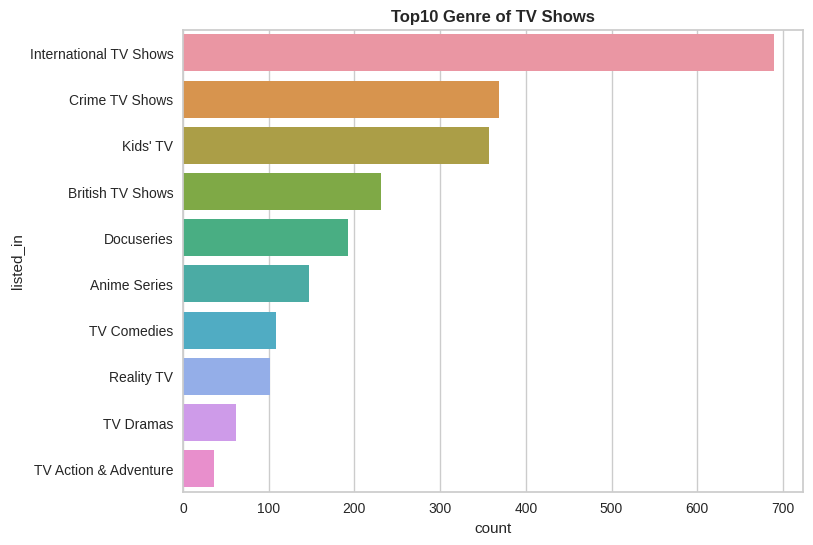

In [ ]:
# Chart - 12 visualization code
plt.figure(figsize=(8,6))
plt.title('Top10 Genre of TV Shows',fontweight="bold")
sns.countplot(y=Tv_shows['listed_in'],data=Tv_shows,order=Tv_shows['listed_in'].value_counts().index[0:10])

##### 1. Why did you pick the specific chart?

Your use of a countplot, a categorical plot commonly employed in Exploratory Data Analysis (EDA), is a commendable choice. This type of plot is effective in visually showcasing the counts of observations within each categorical bin or category, providing a clear and concise representation of the distribution of data across different genres. Countplots are valuable tools for understanding the prevalence of categories within a dataset, making them particularly useful for gaining insights into the distribution of genres in this context.

##### 2. What is/are the insight(s) found from the chart?

The top 5 genres with the highest number of TV show listings are International TV Shows, Crime TV Shows, Kids TV Shows, British TV Shows, and Docuseries. These genres dominate the TV show listings, indicating their popularity and prevalence within the dataset.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Absolutely, the insight that International TV Shows, Crime TV Shows, Kids TV Shows, British TV Shows, and Docuseries are the top genres for TV shows can have a significant positive impact on the business. It suggests a strong preference among viewers for content in these genres. Utilizing this information, platforms can strategically focus on recommending and creating more content within these popular genres. This targeted approach has the potential to enhance user satisfaction, increase engagement, and contribute to the overall success and profitability of the platform.

#### Chart - 13

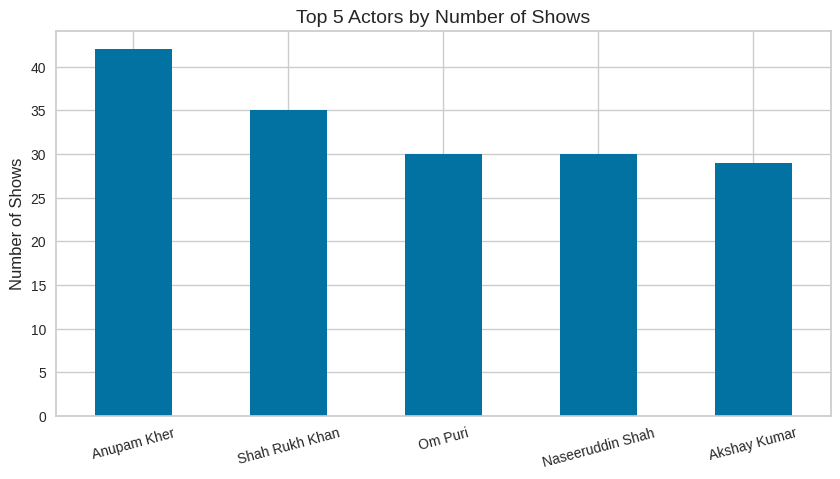

In [ ]:
# Chart - 13 visualization code
dataset_ = dataset[~(dataset['cast']=='Unknown')]
split_cast = dataset_['cast'].str.split(', ', expand=True)
cast_values = split_cast.stack().reset_index(level=1, drop=True)
top_5_actors = cast_values.value_counts().nlargest(5)
top_5_actors.plot(kind='bar', figsize=(10,5))
plt.title('Top 5 Actors by Number of Shows', fontsize=14)
plt.ylabel('Number of Shows', fontsize=12)
plt.xticks(rotation=15)
plt.show()

##### 1. Why did you pick the specific chart?

Your use of a barplot to assess the top 5 directors based on the number of shows they have directed is a sound and effective choice. Barplots are particularly suitable for comparing the counts or frequencies of different categories, making them valuable tools for visualizing the distribution of data in this context. The visual representation provided by a barplot allows for a quick and clear understanding of the directors with the highest number of shows directed, facilitating insights into their impact on the dataset.

##### 2. What is/are the insight(s) found from the chart?

The top 5 directors, based on the number of shows in which they have starred, are:

1. Anupam Kher, with roles in more than 40 shows.
2. Shah Rukh Khan, featuring in 35 shows.
3. Om Puri, appearing in 30 shows.
4. Naseeruddin Shah, also contributing to 30 shows.
5. Akshay Kumar, making appearances in nearly 28 shows.

These insights provide a clear picture of the prolific contributions of these directors within the dataset.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Absolutely, understanding and highlighting the most popular actors on the platform is strategically valuable for Netflix. By leveraging this information, Netflix can make informed decisions about acquiring or producing content that features these actors. This targeted approach has the potential to attract a larger audience, increase viewership, and enhance overall engagement on the platform. Recognizing and capitalizing on the appeal of popular actors contributes to the platform's content strategy and aligns with audience preferences, ultimately driving success and competitiveness in the streaming industry.

#### Chart - 14 - Correlation Heatmap

In [ ]:
# Correlation Heatmap visualization code
corr = dataset.corr()

<ipython-input-42-ce1f426bf14c>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = dataset.corr()


<Axes: >

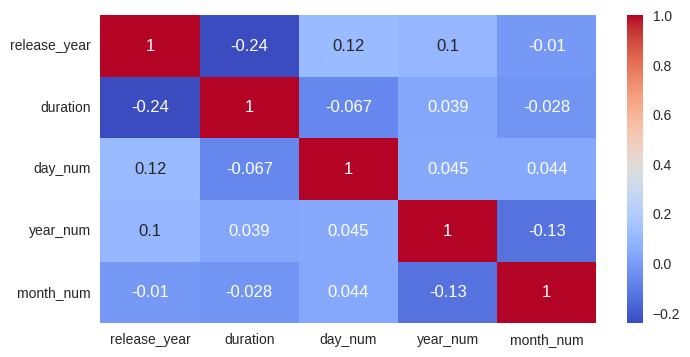

In [ ]:
# Correlation Heatmap visualization code'
plt.figure(figsize=(8,4))
sns.heatmap(corr,annot=True,cmap='coolwarm')

##### 1. Why did you pick the specific chart?

Indeed, heatmaps are graphical representations that use color gradients to depict values in a dataset. These visualizations effectively display relationships between two sets of data by employing color intensity to represent the strength or magnitude of the relationship. Heatmaps are particularly useful for simultaneously comparing multiple variables or categories, providing a comprehensive and visually intuitive way to understand patterns and trends within complex datasets.

##### 2. What is/are the insight(s) found from the chart?

The statement "Release_year is negatively correlated with duration and month_num" suggests that as the release year increases, the duration of shows or movies tends to decrease, and there is a negative correlation between the release year and the month in which the content was added.

Similarly, the statement "Duration is negatively correlated with day_num and month_num" implies that the duration of shows or movies tends to decrease as the day of the month and the month number increase. This suggests a negative correlation between the duration of content and both the day of the month and the month in which it was added or released.

#### Chart - 15 - Pair Plot

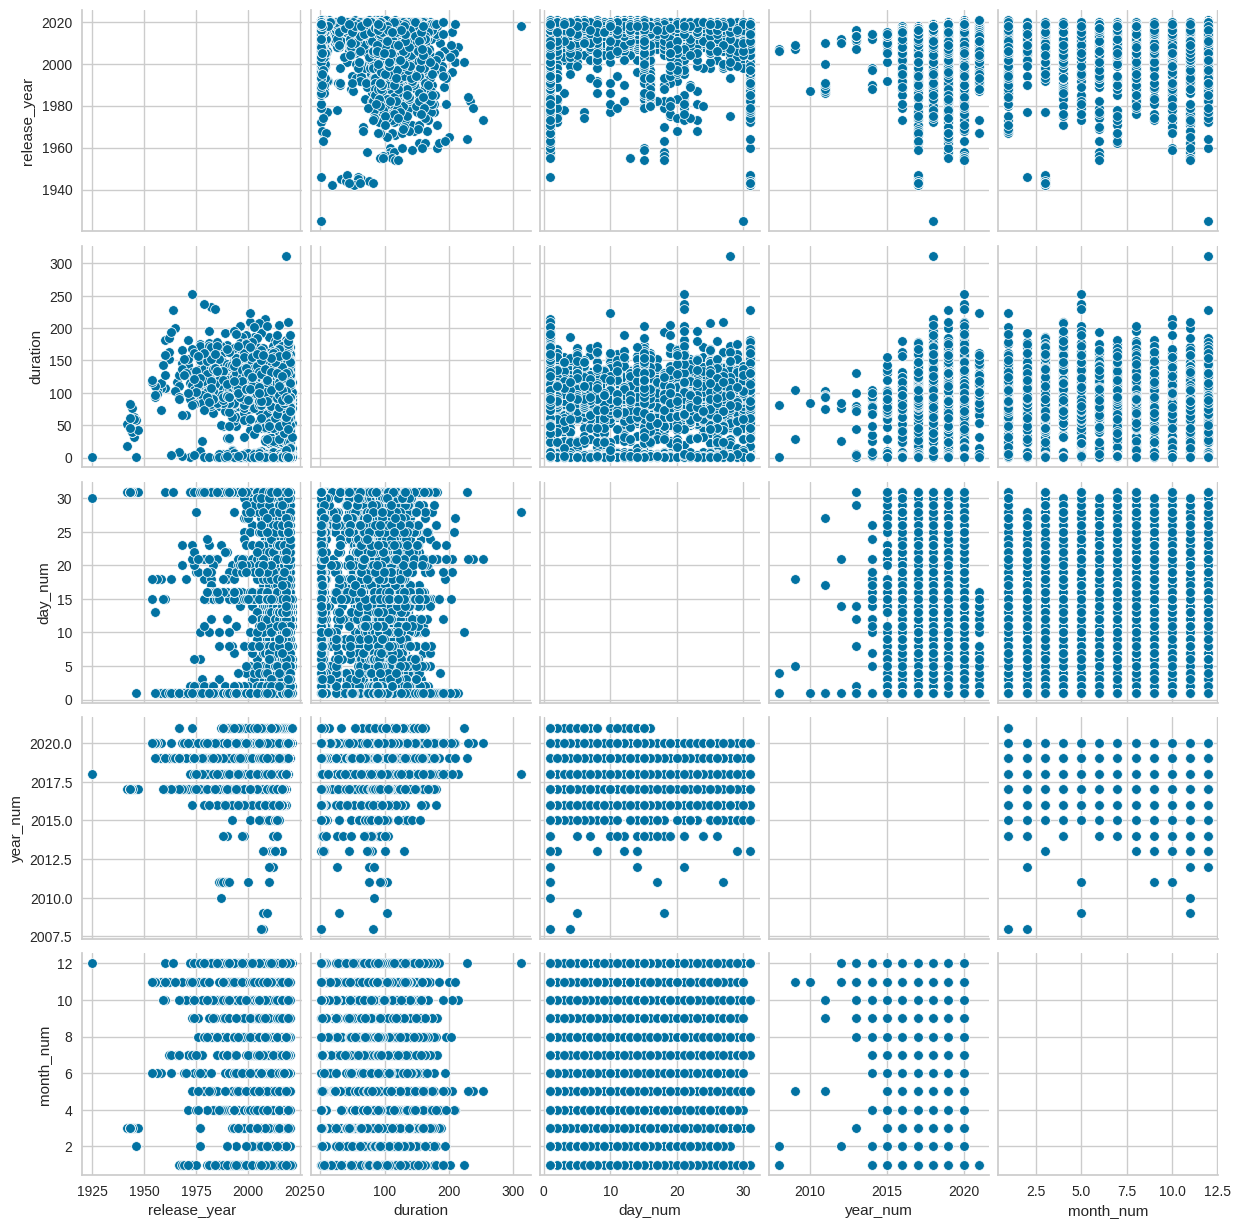

In [ ]:
# Pair Plot visualization code

sns.pairplot(dataset,diag_kind='Kde')

##### 1. Why did you pick the specific chart?

A pairplot, also known as a scatterplot matrix, serves as a comprehensive visualization for exploring relationships between all pairs of variables in a dataset. This tool is instrumental in data analysis, providing a quick and effective means to understand how variables relate to each other.

In our analysis, we employed a pair plot to examine data patterns and relationships between features. This visualization, akin to a correlation map, offers a graphical representation that facilitates a visual understanding of the intricate relationships present in the dataset. The pairplot enables a holistic exploration of variable interactions, aiding in the identification of potential correlations or patterns among different features.

##### 2. What is/are the insight(s) found from the chart?

The diagonal plots in the pairplot provide insights into the range and distribution of each variable. Specifically, they offer a visual representation of the distribution of the duration of movies and TV shows. From these plots, it appears that the distribution of durations is concentrated within certain ranges, indicating where the majority of movies and TV shows fall in terms of duration. This observation contributes to a better understanding of the data distribution and potential patterns in the duration variable.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Statement : The average number of movies on Netflix in the United States is significantly different from the average number of movies on Netflix in India.

Null Hypothesis (H0): There is no significant difference in the release years between movies produced in the United States and movies produced in India.

Alternative Hypothesis (Ha): There is a significant difference in the release years between movies produced in the United States and movies produced in India

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
new_data = dataset.copy()

In [ ]:
# Perform Statistical Test to obtain P-Value
from scipy.stats import ttest_ind

# Filter the movies DataFrame to create two new DataFrames:
# One containing only movies produced in the United States, and one containing only movies produced in India
us_movie_df = new_data[new_data.country == 'United States']
india_movie_df = new_data[new_data.country == 'India']

# Perform a two-sample t-test between the release years of the two groups of movies
t_statistic, p_value = ttest_ind(us_movie_df['release_year'], india_movie_df['release_year'], equal_var=False)

# Set the significance level to 0.05
alpha = 0.05

# Print the calculated t-statistic and p-value
print("T-Statistic:", t_statistic)
print("P-Value:", p_value)

# Check if the calculated p-value is less than the significance level
if p_value < alpha:
    # If the p-value is less than the significance level, reject the null hypothesis
    print("Reject Null Hypothesis: There is a significant difference in release years between movies produced in the United States and India.")
else:
    # If the p-value is greater than or equal to the significance level, fail to reject the null hypothesis
    print("Fail to Reject Null Hypothesis: No significant difference in release years between movies produced in the United States and India.")

# Deleting the temporary dataframes we obtained to calculate the alpha value
del us_movie_df
del india_movie_df

T-Statistic: 5.727073330819272
P-Value: 1.2288137874624823e-08
Reject Null Hypothesis: There is a significant difference in release years between movies produced in the United States and India.


##### Which statistical test have you done to obtain P-Value?

In this analysis, I employed the two-sample t-test, also referred to as an independent samples t-test or unpaired t-test, to obtain the p-value. I utilized the `ttest_ind` function from the scipy.stats module, designed for examining the means of two independent samples. Employing this statistical test allowed me to calculate the p-value, enabling an assessment of whether a significant difference exists in the number of movies between the two countries.

##### Why did you choose the specific statistical test?

I chose the two-sample t-test for this analysis due to its effectiveness in comparing the means of two independent samples. In this particular case, we are dealing with separate sets of movie data from Netflix for the United States and India. The goal is to identify any significant differences in the average number of movies between these two countries.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis(H0) - There is no significant difference in the average duration of movies and TV shows on Netflix.

Alternative Hypothesis(H1) - There is a significant difference in the average duration of movies and TV shows on Netflix.

#### 2. Perform an appropriate statistical test.

In [ ]:

# Perform Statistical Test to obtain P-Value
movie_durations = new_data[new_data['type'] == 'Movie']['duration']
tv_show_durations = new_data[new_data['type'] == 'TV Show']['duration']

# Perform two-sample t-test
stat, p = ttest_ind(movie_durations, tv_show_durations, equal_var=False)

# Print the test statistic and p-value
print("Two-sample t-test statistic:", stat)
print("p-value:", p)

# Interpret the result
alpha = 0.05
if p > alpha:
    print("Failed to reject null hypothesis.")
else:
    print("Reject null hypothesis.")

Two-sample t-test statistic: 249.87262245461815
p-value: 0.0
Reject null hypothesis.


##### Which statistical test have you done to obtain P-Value?

The statistical test employed to derive the p-value is the two-sample t-test. This choice was made because we are engaged in a comparison of the means of two independent samples—specifically, the durations of movies and TV shows. The objective is to ascertain whether the observed difference between the sample means is statistically significant or could have occurred purely by chance.

##### Why did you choose the specific statistical test?

The two-sample t-test is contingent on certain assumptions, including normal distribution within samples, independence of samples, and the potential for unequal variances between the two groups under comparison. In our analysis, we assumed that the duration of movies and TV shows on Netflix adheres to a normal distribution, and we treated the samples as independent. Moreover, we took into account the potential for unequal variances between movie and TV show durations, recognizing the inherent differences in their content nature.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Statement 3: There is a significant difference between the proportions of Movies and TV Shows.

Null Hypothesis (H0): The proportion of movies in the dataset is equal to the proportion of TV shows.

Alternative Hypothesis (H1): The proportion of movies in the dataset is greater than the proportion of TV shows.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
from statsmodels.stats.proportion import proportions_ztest
n_movies = new_data[new_data['type'] == 'Movie'].count()['type']
n_tv_shows = new_data[new_data['type'] == 'Tv_Shows'].count()['type']

# Set the counts and sample sizes for the z-test
counts = [n_movies, n_tv_shows]  # Number of movies and TV shows
nobs = [len(new_data), len(new_data)]  # Total number of observations in the DataFrame

# Perform a z-test assuming equal proportions
z_stat, p_val = proportions_ztest(counts, nobs, value=0, alternative='larger')

# Print the results of the z-test
print('z-statistic:', z_stat)
print('p-value:', p_val)

# Set the significance level
alpha = 0.05

# Check if the p-value is less than the significance level
if p_val < alpha:
    print('Reject Null Hypothesis: There is a significant difference between the proportions of Movies and TV Shows.')
else:
    print('Fail to Reject Null Hypothesis: There is no significant difference between the proportions of Movies and TV Shows.')

z-statistic: 90.65279072455056
p-value: 0.0
Reject Null Hypothesis: There is a significant difference between the proportions of Movies and TV Shows.


##### Which statistical test have you done to obtain P-Value?

The statistical test employed to calculate the p-value is the Z-test for proportions. This test is specifically designed to compare the proportions of two independent groups and assess whether a significant difference exists between them. In our analysis, we utilized this test to compare the proportions of movies and TV shows within the dataset.

##### Why did you choose the specific statistical test?

In this particular scenario, I opted for the Z-test for proportions because we were comparing two proportions (movies and TV shows) within a substantial dataset. The Z-test is particularly well-suited for larger sample sizes, assuming a normal distribution for the sampling distribution of proportions. Given the categorical nature of the data (movies vs. TV shows) and our goal to determine a significant difference in their proportions, the Z-test is a fitting choice. Additionally, it proves valuable when there is prior knowledge about the population proportion (in this case, assuming no difference) and our objective is to assess whether the observed data significantly deviates from this assumption.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation
dataset.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
release_year    0
rating          0
duration        0
listed_in       0
description     0
day_num         0
year_num        0
month_num       0
Month           0
target_ages     0
dtype: int64

#### What all missing value imputation techniques have you used and why did you use those techniques?

I have used isnull().sum() to identify null values in the data because this technique shows us if there are any null values present in your dataset or not.

### 2. Handling Outliers

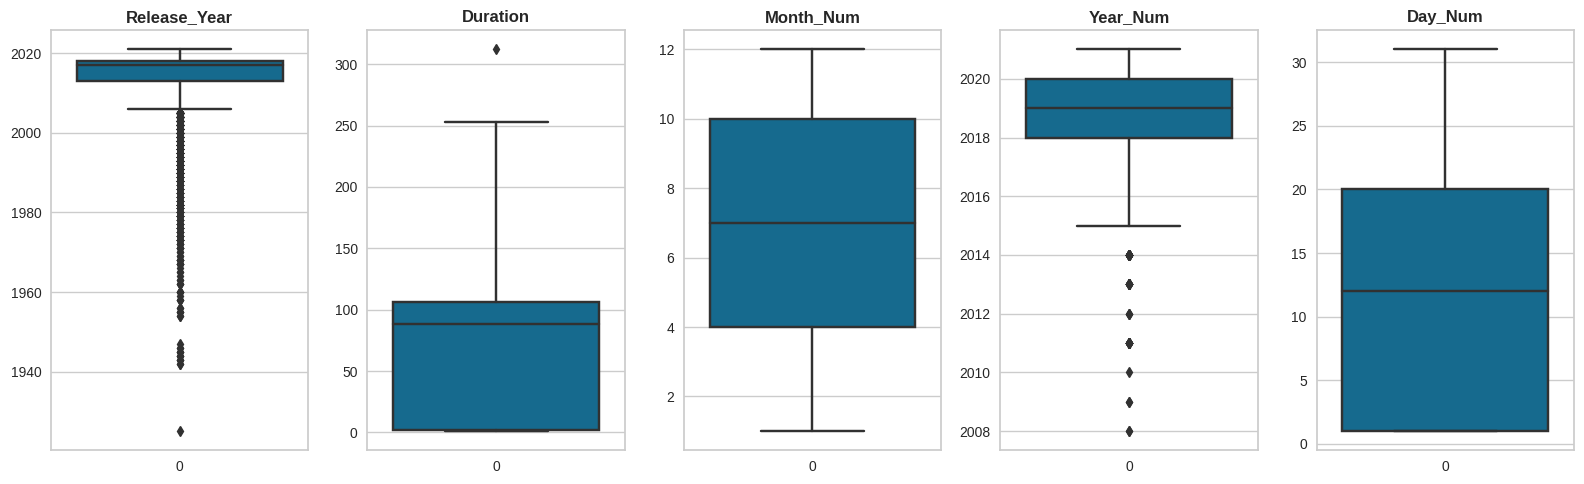

In [ ]:
# Handling Outliers & Outlier treatments
continous_value_feature= ["release_year","duration","month_num","year_num","day_num"]

plt.figure(figsize=(16,5))
for n,column in enumerate(continous_value_feature):
  plt.subplot(1, 5, n+1)
  sns.boxplot(dataset[column])
  plt.title(f'{column.title()}',weight='bold')
  plt.tight_layout()

In [ ]:
column_to_check = ["release_year","duration","month_num","year_num","day_num"]
percentile_25 = dataset[column_to_check].quantile(0.25)
percentile_75 =  dataset[column_to_check].quantile(0.75)
iqr = percentile_75 - percentile_25
upper_limit = percentile_75 + 1.5 * iqr
lower_limit = percentile_25 - 1.5 * iqr
dataset[column_to_check] = np.where(
    dataset[column_to_check] > upper_limit,
    upper_limit,
    np.where(
        dataset[column_to_check] < lower_limit,
        lower_limit,
        dataset[column_to_check]

    )
)

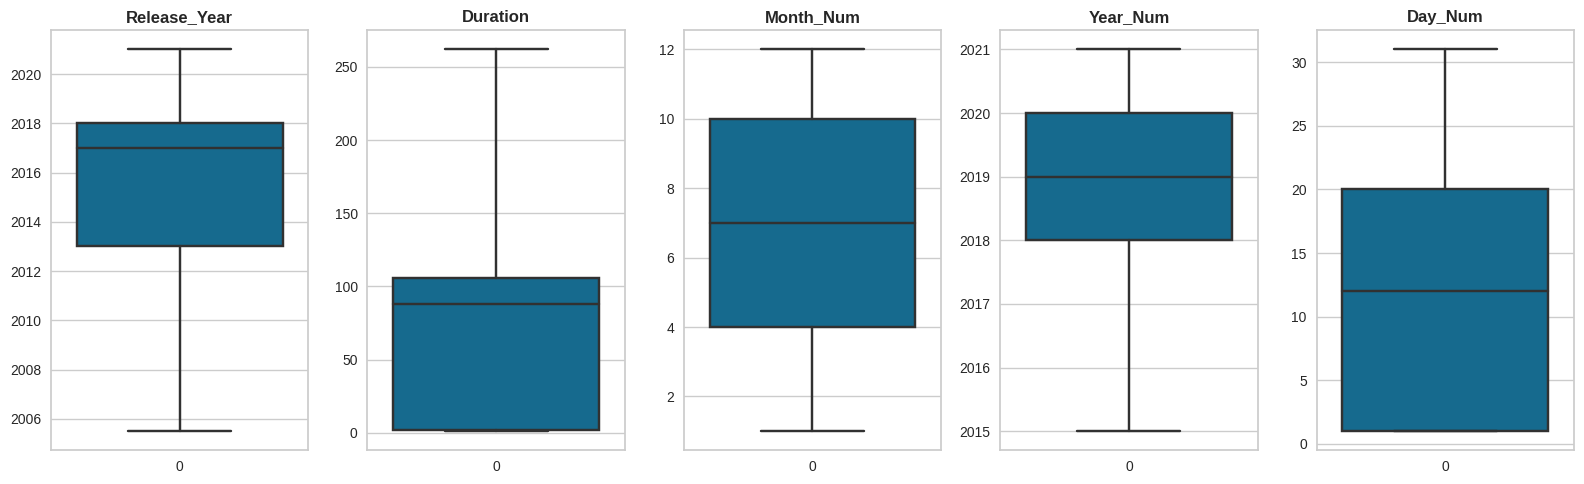

In [ ]:
continous_value_feature= ["release_year","duration","month_num","year_num","day_num"]

plt.figure(figsize=(16,5))
for n,column in enumerate(continous_value_feature):
  plt.subplot(1, 5, n+1)
  sns.boxplot(dataset[column])
  plt.title(f'{column.title()}',weight='bold')
  plt.tight_layout()

##### What all outlier treatment techniques have you used and why did you use those techniques?

In this context, I applied both the IQR method and the Capping method to handle outliers. With the Capping method, outliers were capped up to the 75th percentile, and any values beyond that threshold were set to the upper limit value. Following the application of the IQR method, all outliers were successfully eliminated from the dataset.

### 3. Categorical Encoding

In [ ]:
# Encode your categorical columns
dataset['movie'] = dataset['type'].apply(lambda x: 1 if x=='Movie' else 0)

In [ ]:
dataset['tv_show'] = dataset['type'].apply(lambda x: 0 if x=='Movie' else 1)

In [ ]:
dataset.drop(columns=['type'],inplace=True)

#### What all categorical encoding techniques have you used & why did you use those techniques?

I created two separate new columns.

1 - movie

2 - tv_show

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [ ]:
# Expand Contraction
dataset['new_var'] =(dataset['description'].astype(str) + ' ' +
                  dataset['listed_in'].astype(str)   + ' ' +
                  dataset['rating'].astype(str)      + ' ' +
                  dataset['cast'].astype(str)        + ' ' +
                  dataset['country'].astype(str))

In [ ]:
dataset.new_var[0]

'In a future where the elite inhabit an island paradise far from the crowded slums, you get one chance to join the 3% saved from squalor. International TV Shows TV-MA João Miguel, Bianca Comparato, Michel Gomes, Rodolfo Valente, Vaneza Oliveira, Rafael Lozano, Viviane Porto, Mel Fronckowiak, Sergio Mamberti, Zezé Motta, Celso Frateschi Brazil'

#### 2. Lower Casing

In [ ]:
# Lower Casing
dataset['Lower_Casing']= dataset['new_var'].str.lower()
dataset.Lower_Casing[0]

'in a future where the elite inhabit an island paradise far from the crowded slums, you get one chance to join the 3% saved from squalor. international tv shows tv-ma joão miguel, bianca comparato, michel gomes, rodolfo valente, vaneza oliveira, rafael lozano, viviane porto, mel fronckowiak, sergio mamberti, zezé motta, celso frateschi brazil'

#### 3. Removing Punctuations

In [ ]:
# Remove Punctuations
[punc for punc in string.punctuation]
def remove_punctuation(text):
    return text.translate(str.maketrans('', '', string.punctuation))

In [ ]:
dataset['cleaned_text'] = dataset['Lower_Casing'].apply(remove_punctuation)

In [ ]:
dataset.cleaned_text[0]

'in a future where the elite inhabit an island paradise far from the crowded slums you get one chance to join the 3 saved from squalor international tv shows tvma joão miguel bianca comparato michel gomes rodolfo valente vaneza oliveira rafael lozano viviane porto mel fronckowiak sergio mamberti zezé motta celso frateschi brazil'

#### 4. Removing URLs & Removing words and digits contain digits.

In [ ]:
# Remove URLs & Remove words and digits contain digits
def remove_urls(text):
  url_number_pattern = re.compile(r'https?://\S+|www\.\S+')
  text = re.sub(url_number_pattern,'', text)
  text = re.sub('[^a-zA-Z]', ' ', text)
  return text

In [ ]:
dataset['cleaned_text']= dataset['cleaned_text'].apply(remove_urls)

In [ ]:
dataset.cleaned_text[0]

'in a future where the elite inhabit an island paradise far from the crowded slums you get one chance to join the   saved from squalor international tv shows tvma jo o miguel bianca comparato michel gomes rodolfo valente vaneza oliveira rafael lozano viviane porto mel fronckowiak sergio mamberti zez  motta celso frateschi brazil'

In [ ]:
# Remove Stopwords
def remove_stopwords(text):
    stop_words = set(stopwords.words('english'))
    words = text.split()
    words = [word for word in words if word not in stop_words]
    cleaned_text = ' '.join(words)
    return cleaned_text

In [ ]:
dataset['removed_stopwords'] = dataset['cleaned_text'].apply(remove_stopwords)
dataset.removed_stopwords[0]

'future elite inhabit island paradise far crowded slums get one chance join saved squalor international tv shows tvma jo miguel bianca comparato michel gomes rodolfo valente vaneza oliveira rafael lozano viviane porto mel fronckowiak sergio mamberti zez motta celso frateschi brazil'

In [ ]:
# Remove White spaces
def remove_whitespaces(text):
    cleaned_text = text.strip()
    return cleaned_text

In [ ]:
dataset['remove_whitespaces'] = dataset['removed_stopwords'].apply(remove_whitespaces)
dataset['remove_whitespaces'].head()

0    future elite inhabit island paradise far crowd...
1    devastating earthquake hits mexico city trappe...
2    army recruit found dead fellow soldiers forced...
3    postapocalyptic world ragdoll robots hide fear...
4    brilliant group students become cardcounting e...
Name: remove_whitespaces, dtype: object

In [ ]:
# Tokenization
def tokenize_text(text):
    tokens = nltk.word_tokenize(text)
    return tokens

In [ ]:
dataset['tokenized'] = dataset['remove_whitespaces'].apply(tokenize_text)

In [ ]:
dataset['tokenized'].head()

0    [future, elite, inhabit, island, paradise, far...
1    [devastating, earthquake, hits, mexico, city, ...
2    [army, recruit, found, dead, fellow, soldiers,...
3    [postapocalyptic, world, ragdoll, robots, hide...
4    [brilliant, group, students, become, cardcount...
Name: tokenized, dtype: object

In [ ]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)
wordnet  = WordNetLemmatizer()
def lemmatizing_sentence(text):
    '''This function is used for lemmatizing (changing the given word into meaningfull word) the words from the given sentence'''
    text = [wordnet.lemmatize(word) for word in text]

    # joining the list of words with space separator
    text=  " ".join(text)

    # return the manipulated string
    return text

In [ ]:
dataset['tokenized'] = dataset['tokenized'].apply(lemmatizing_sentence)

In [ ]:
dataset.tokenized[0]

'future elite inhabit island paradise far crowded slum get one chance join saved squalor international tv show tvma jo miguel bianca comparato michel gomes rodolfo valente vaneza oliveira rafael lozano viviane porto mel fronckowiak sergio mamberti zez motta celso frateschi brazil'

In [ ]:
# POS Taging
dataset['pos_tags'] = dataset['tokenized'].apply(nltk.word_tokenize).apply(nltk.pos_tag)

In [ ]:
dataset.head(3)

,show_id,title,director,cast,country,release_year,rating,duration,listed_in,description,...,target_ages,movie,tv_show,new_var,Lower_Casing,cleaned_text,removed_stopwords,remove_whitespaces,tokenized,pos_tags
0,s1,3%,Unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020.0,TV-MA,4.0,International TV Shows,In a future where the elite inhabit an island ...,...,Adults,0,1,In a future where the elite inhabit an island ...,in a future where the elite inhabit an island ...,in a future where the elite inhabit an island ...,future elite inhabit island paradise far crowd...,future elite inhabit island paradise far crowd...,future elite inhabit island paradise far crowd...,"[(future, JJ), (elite, JJ), (inhabit, NN), (is..."
1,s2,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016.0,TV-MA,93.0,Dramas,After a devastating earthquake hits Mexico Cit...,...,Adults,1,0,After a devastating earthquake hits Mexico Cit...,after a devastating earthquake hits mexico cit...,after a devastating earthquake hits mexico cit...,devastating earthquake hits mexico city trappe...,devastating earthquake hits mexico city trappe...,devastating earthquake hit mexico city trapped...,"[(devastating, VBG), (earthquake, NN), (hit, V..."
2,s3,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2011.0,R,78.0,Horror Movies,"When an army recruit is found dead, his fellow...",...,Adults,1,0,"When an army recruit is found dead, his fellow...","when an army recruit is found dead, his fellow...",when an army recruit is found dead his fellow ...,army recruit found dead fellow soldiers forced...,army recruit found dead fellow soldiers forced...,army recruit found dead fellow soldier forced ...,"[(army, NN), (recruit, NN), (found, VBN), (dea..."


In [ ]:
# Vectorizing Text
tfidfv = TfidfVectorizer(max_features=30000)
x = tfidfv.fit_transform(dataset['tokenized'])
x.shape

(7777, 30000)

In [ ]:
X = x.toarray()

In [ ]:
# DImensionality Reduction (If needed)
n_components = 10
pca = PCA(n_components = n_components)
pca.fit_transform(x.toarray())
Explained_Variance = pca.explained_variance_ratio_

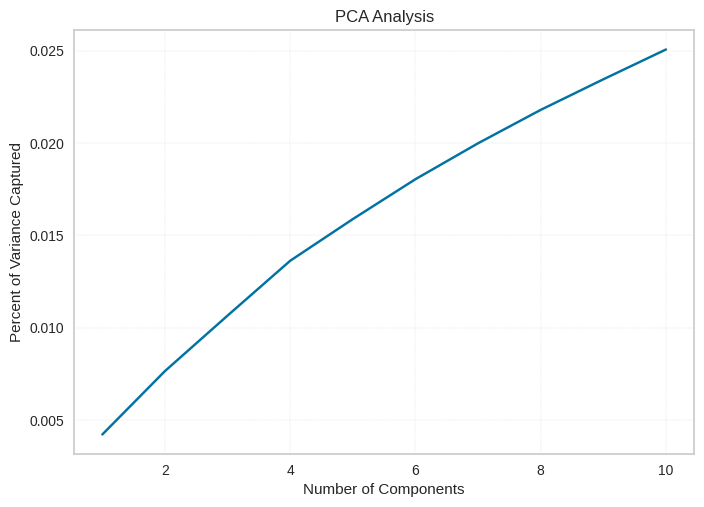

In [ ]:
fig, ax = plt.subplots()
ax.plot(range(1, len(Explained_Variance)+1), np.cumsum(pca.explained_variance_ratio_))
ax.set_xlabel('Number of Components')
ax.set_ylabel('Percent of Variance Captured')
ax.set_title('PCA Analysis')
plt.grid(linestyle = '--', linewidth = 0.2)
plt.show()

In [ ]:
svd = TruncatedSVD()
x_svd = svd.fit_transform(X)

# Calculate the number of components needed for 95% variance
explained_variance = svd.explained_variance_ratio_
cumulative_variance = explained_variance.cumsum()
n_components = np.argmax(cumulative_variance >= 0.95) + 1

svd_tuned = TruncatedSVD(n_components=n_components)

# Fitting and transforming the model
X_transformed_Text = svd_tuned.fit_transform(x)

X_transformed_Text.shape

(7777, 1)

## ***7. ML Model Implementation***

### ML Model - 1

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

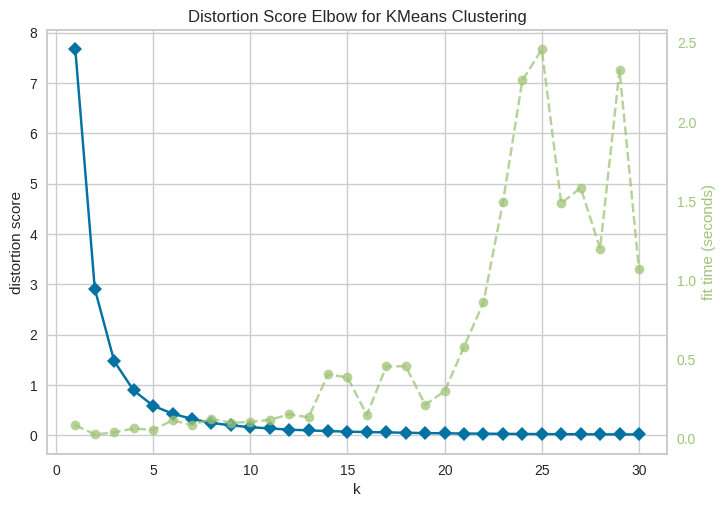

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model
kmean_ = KMeans(random_state=0)
visualizer = KElbowVisualizer(kmean_, k=(1,31),locate_elbow=False)

# Fit the Algorithm
visualizer.fit(X_transformed_Text)

# Predict on the model
visualizer.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

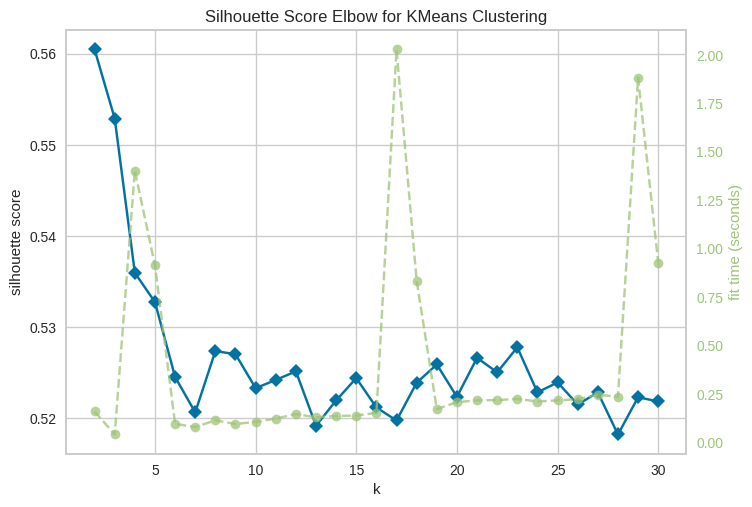

<Axes: title={'center': 'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [ ]:
visualizer = KElbowVisualizer(kmean_, k=(2,31), metric='silhouette', timings=True, locate_elbow=False)
visualizer.fit(X_transformed_Text)
visualizer.show()

In [ ]:
k_range = range(2, 10)
for k in k_range:
    Kmodel = KMeans(n_clusters=k)
    labels = Kmodel.fit_predict(X_transformed_Text)
    score = silhouette_score(x, labels)
    print("k=%d, Silhouette score=%f" % (k, score))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k=2, Silhouette score=0.001052


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k=3, Silhouette score=-0.000040


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k=4, Silhouette score=-0.000927


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k=5, Silhouette score=-0.001432


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k=6, Silhouette score=-0.001861


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k=7, Silhouette score=-0.002589


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k=8, Silhouette score=-0.002613


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k=9, Silhouette score=-0.002751


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


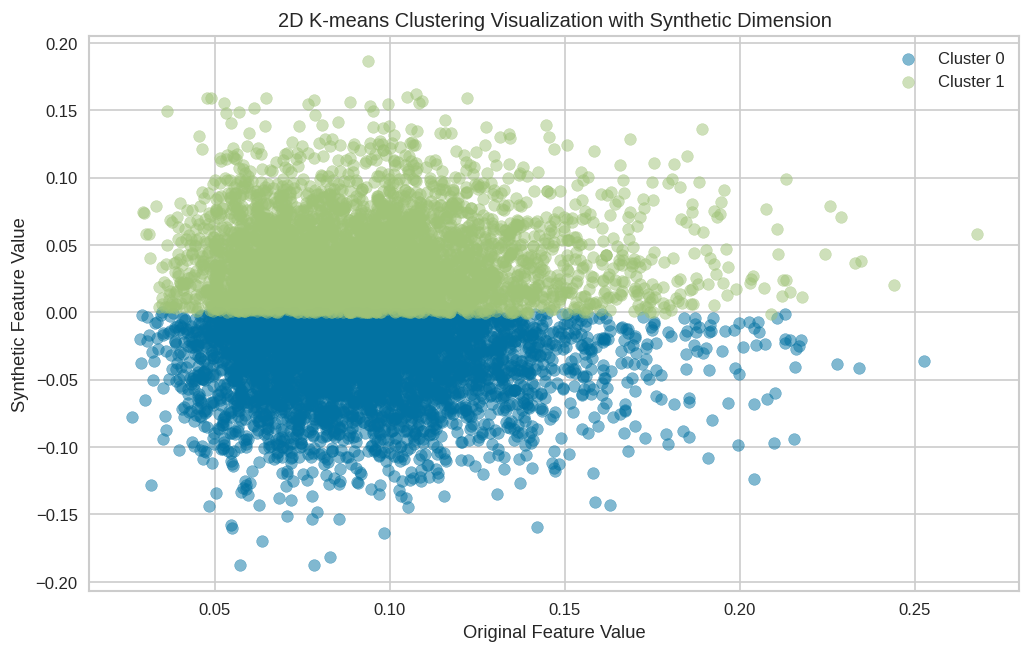

In [ ]:
synthetic_dimension = np.random.normal(0, 0.05, size=X_transformed_Text.shape)  # adding random noise
x_augmented = np.hstack((X_transformed_Text, synthetic_dimension.reshape(-1, 1)))

# Re-run K-means clustering on the augmented data
kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0)
labels = kmeans.fit_predict(x_augmented)

# Plotting the results in a 2D scatter plot
plt.figure(figsize=(10, 6), dpi=120)
unique_labels = np.unique(labels)
for i in unique_labels:
    plt.scatter(x_augmented[labels == i, 0], x_augmented[labels == i, 1], label=f'Cluster {i}', alpha=0.5)
plt.title('2D K-means Clustering Visualization with Synthetic Dimension')
plt.xlabel('Original Feature Value')
plt.ylabel('Synthetic Feature Value')
plt.legend()
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


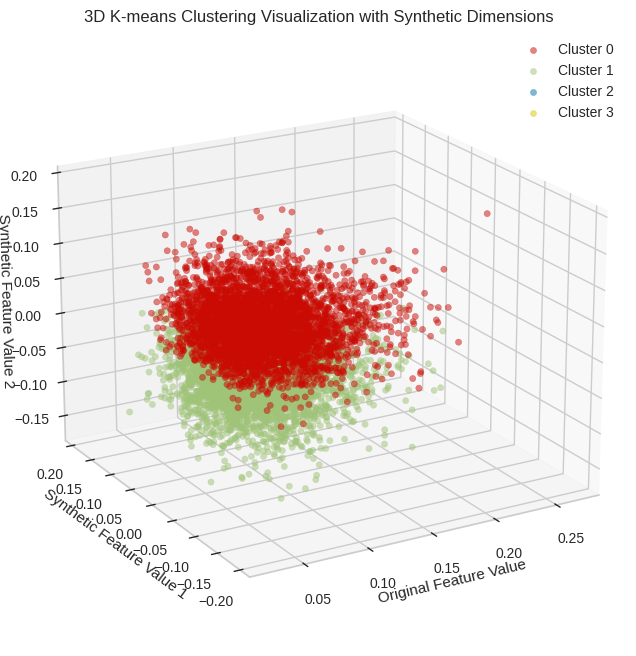

In [ ]:
synthetic_dimension_1 = np.random.normal(0, 0.05, size=X_transformed_Text.shape)
synthetic_dimension_2 = np.random.normal(0, 0.05, size=X_transformed_Text.shape)
x_augmented_3d = np.hstack((X_transformed_Text, synthetic_dimension_1.reshape(-1, 1), synthetic_dimension_2.reshape(-1, 1)))

# Re-run K-means clustering on the augmented data
kmeans_3d = KMeans(n_clusters=2, init='k-means++', random_state=0)
labels_3d = kmeans_3d.fit_predict(x_augmented_3d)

# Plotting the results in a 3D scatter plot
fig = plt.figure(figsize=(20, 8))
ax = fig.add_subplot(111, projection='3d')
colors = ['r', 'g', 'b', 'y']
for i in range(len(colors)):
    ax.scatter(x_augmented_3d[labels_3d == i, 0], x_augmented_3d[labels_3d == i, 1], x_augmented_3d[labels_3d == i, 2], c=colors[i], label=f'Cluster {i}', alpha=0.5)

# Rotate the plot 30 degrees around the X axis and 45 degrees around the Z axis
ax.view_init(elev=20, azim=-120)
ax.set_xlabel('Original Feature Value')
ax.set_ylabel('Synthetic Feature Value 1')
ax.set_zlabel('Synthetic Feature Value 2')
plt.legend()
plt.title('3D K-means Clustering Visualization with Synthetic Dimensions')
plt.show()

In [ ]:
dataset['kmeans_cluster'] = kmeans.labels_

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart
def kmeans_wordcloud(cluster_number, column_name):
    '''function for Building a wordcloud for the movie/shows'''

    #Importing libraries
    from wordcloud import WordCloud, STOPWORDS

    # Filter the data by the specified cluster number and column name
    df_wordcloud = dataset[['kmeans_cluster', column_name]].dropna()
    df_wordcloud = df_wordcloud[df_wordcloud['kmeans_cluster'] == cluster_number]
    df_wordcloud = df_wordcloud[df_wordcloud[column_name].str.len() > 0]

    # Combine all text documents into a single string
    text = " ".join(word for word in df_wordcloud[column_name])

    # Create the word cloud
    wordcloud = WordCloud(stopwords=set(STOPWORDS), background_color="black").generate(text)

    # Convert the wordcloud to a numpy array
    image_array = wordcloud.to_array()

    # Return the numpy array
    return image_array

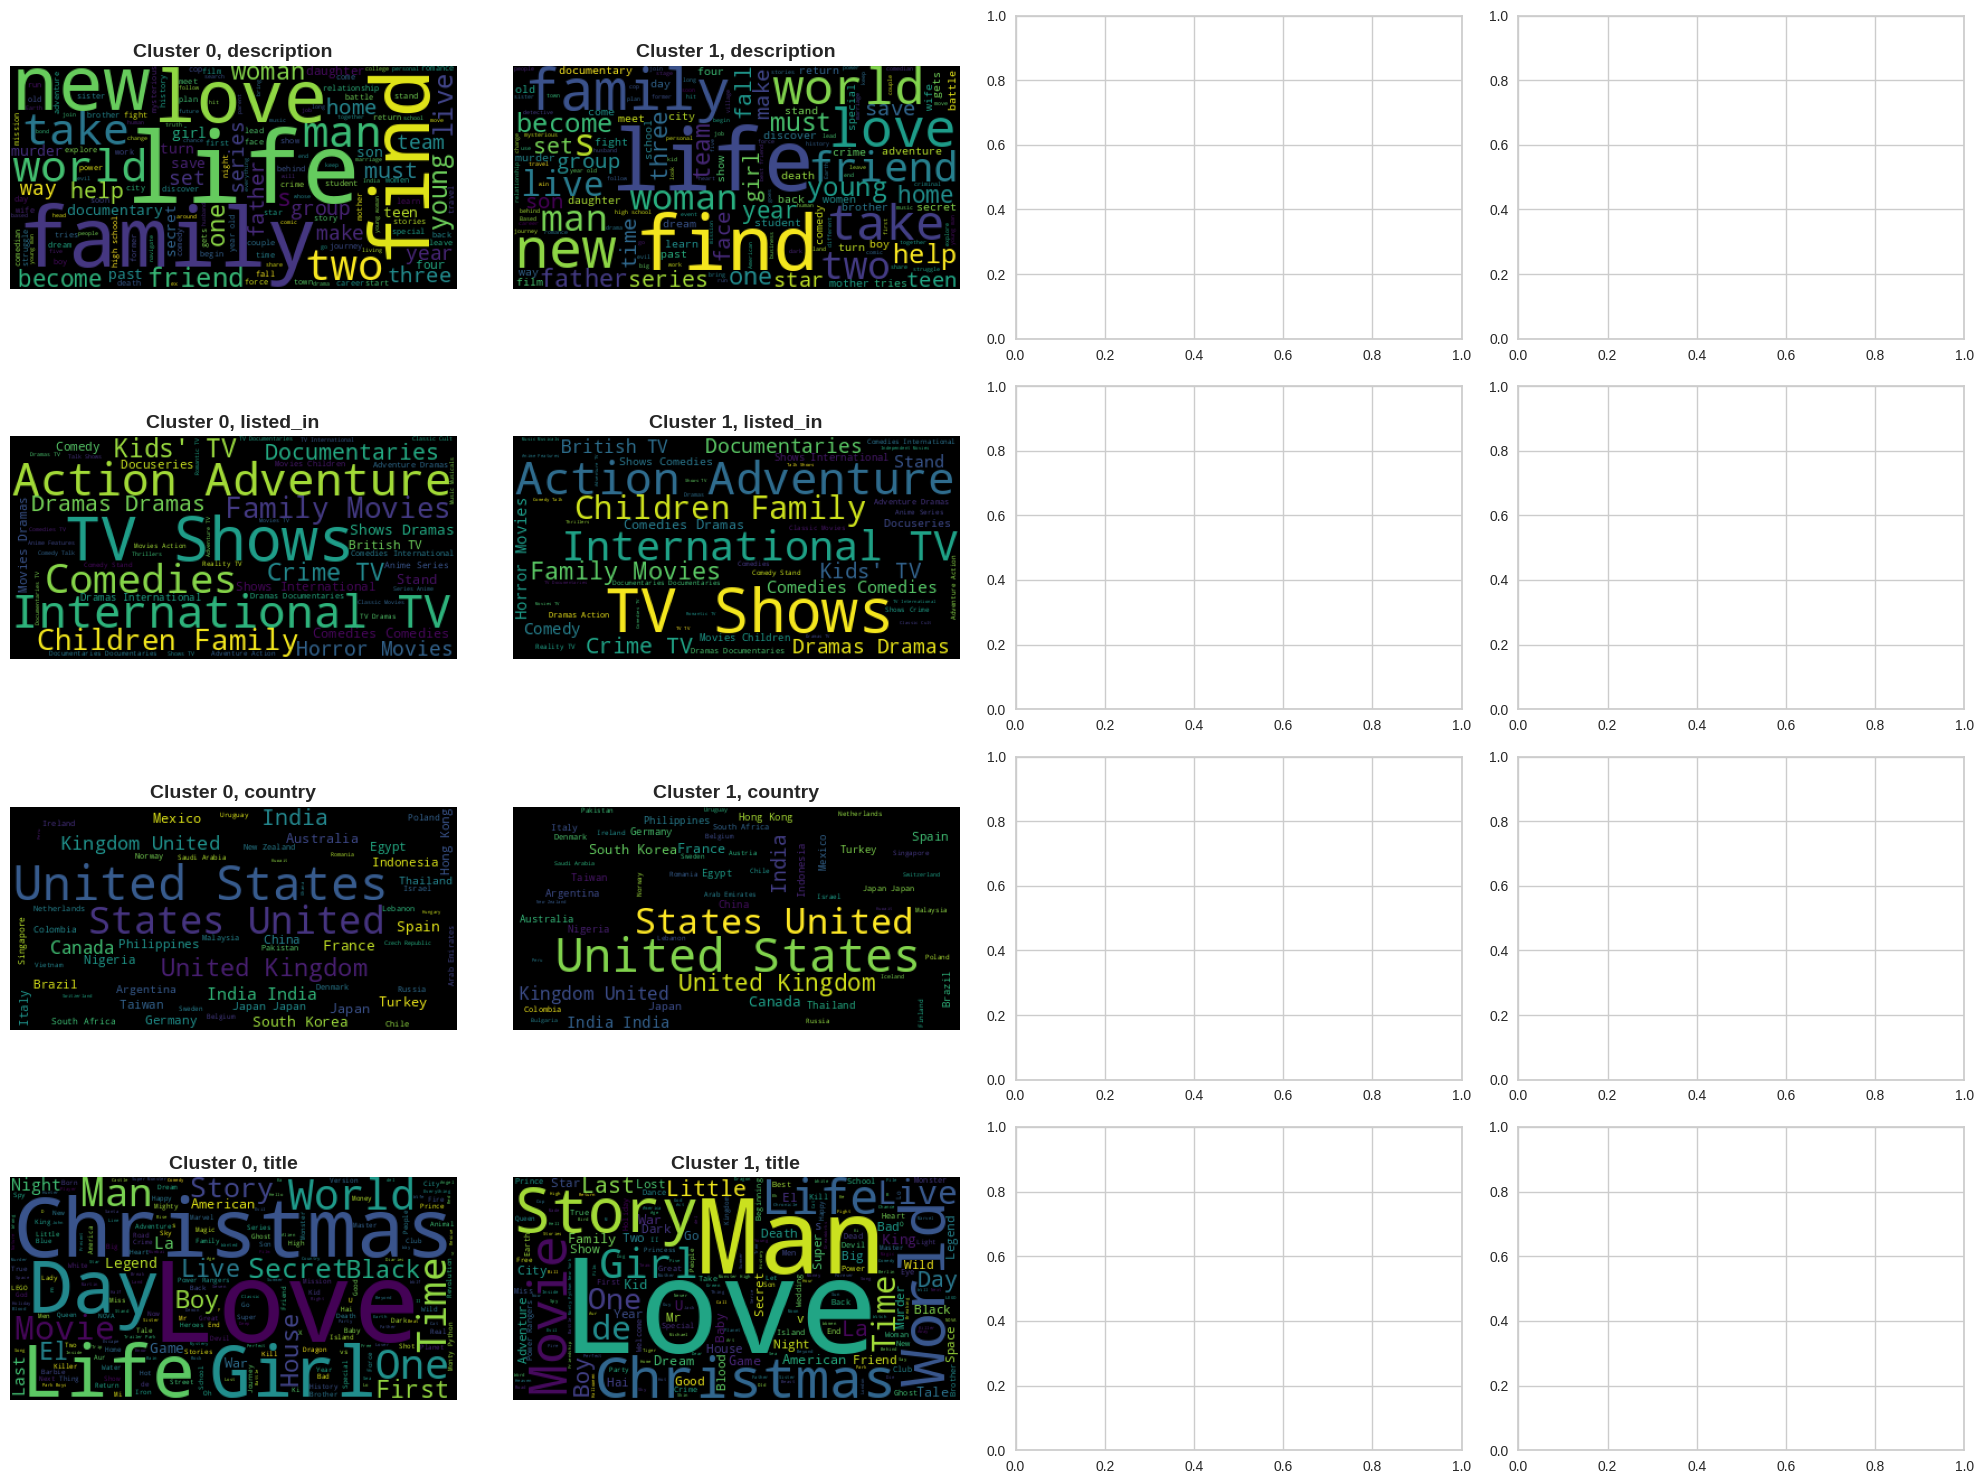

In [ ]:
fig, axs = plt.subplots(nrows=4, ncols=4, figsize=(20, 15))
for i in range(2):
    for j, col in enumerate(['description', 'listed_in', 'country', 'title']):
        axs[j][i].imshow(kmeans_wordcloud(i, col))
        axs[j][i].axis('off')
        axs[j][i].set_title(f'Cluster {i}, {col}',fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

### ML Model - 2

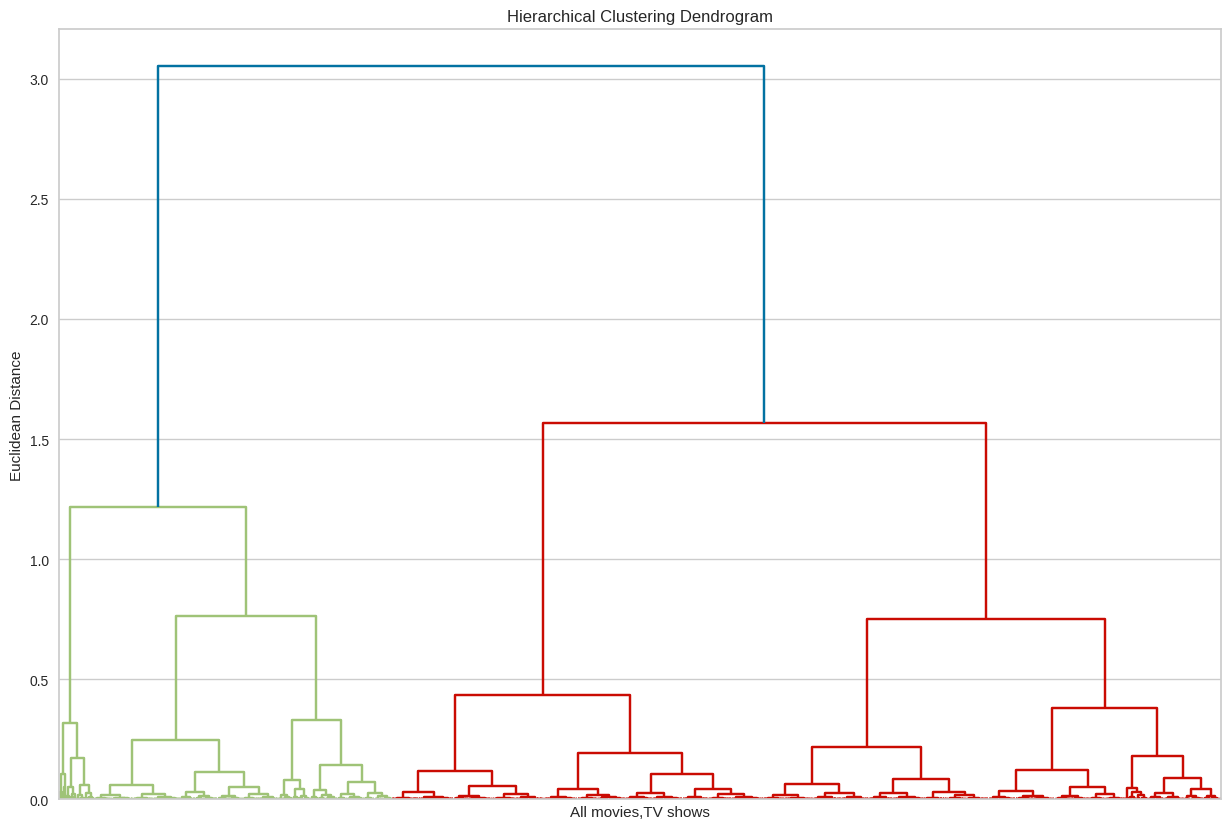

In [ ]:
from scipy.cluster.hierarchy import linkage, dendrogram
Linkage_distance_ = linkage(X_transformed_Text, method = 'ward', metric = 'euclidean')
plt.figure(figsize=(15,10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('All movies,TV shows')
plt.ylabel('Euclidean Distance')

dendrogram(Linkage_distance_, no_labels = True)
plt.show()

In [ ]:
from sklearn.cluster import AgglomerativeClustering
k_range = range(2, 10)
for k in k_range:
    agglomerative_model = AgglomerativeClustering(n_clusters=k)
    labels = agglomerative_model.fit_predict(X_transformed_Text)
    score = silhouette_score(X, labels)
    print("k=%d, Silhouette score=%f" % (k, score))

k=2, Silhouette score=0.000712
k=3, Silhouette score=0.000496
k=4, Silhouette score=-0.001878
k=5, Silhouette score=-0.001950
k=6, Silhouette score=-0.001956
k=7, Silhouette score=-0.001959
k=8, Silhouette score=-0.001988


In [ ]:
synthetic_dimension_1 = np.random.normal(0, 0.05, size = X_transformed_Text.shape)
synthetic_dimension_2 = np.random.normal(0, 0.05, size = X_transformed_Text.shape)
x_augmented_3d = np.hstack((X_transformed_Text, synthetic_dimension_1.reshape(-1, 1), synthetic_dimension_2.reshape(-1, 1)))

Model_3d = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
labels_3d = Model_3d.fit_predict(x_augmented_3d)

fig = plt.figure(figsize=(15,6))
ax = fig.add_subplot(111, projection='3d')
colors = ['r', 'g', 'b', 'y']
for i in range(2):
    ax.scatter(x_augmented_3d[labels_3d == i, 0], x_augmented_3d[labels_3d == i, 1], x_augmented_3d[labels_3d == i, 2], c=colors[i], label=f'Cluster {i}', alpha=0.5)

ax.set_xlabel('Original Feature Value')
ax.set_ylabel('Synthetic Feature Value 1')
ax.set_zlabel('Synthetic Feature Value 2')
plt.legend()
plt.title('3D Agglomerative Clustering Visualization with Synthetic Dimensions')
plt.show()

In [ ]:
dataset['agglomerative_cluster'] = Model_3d.labels_

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart
def agglomerative_wordcloud(cluster_number, column_name):
  '''function for Building a wordcloud for the movie/shows'''

  #Importing libraries
  from wordcloud import WordCloud, STOPWORDS

  # Filter the data by the specified cluster number and column name
  df_wordcloud = dataset[['agglomerative_cluster', column_name]].dropna()
  df_wordcloud = df_wordcloud[df_wordcloud['agglomerative_cluster'] == cluster_number]

  # Combine all text documents into a single string
  text = " ".join(word for word in df_wordcloud[column_name])

  # Create the word cloud
  wordcloud = WordCloud(stopwords=set(STOPWORDS), background_color="black").generate(text)

  # Return the word cloud object
  return wordcloud

In [ ]:
fig, axs = plt.subplots(nrows=4, ncols=2, figsize=(20, 15))
for i in range(2):
    for j, col in enumerate(['description', 'listed_in', 'country', 'title']):
        axs[j][i].imshow(agglomerative_wordcloud(i, col))
        axs[j][i].axis('off')
        axs[j][i].set_title(f'Cluster {i}, {col}',fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

### ML Model - 3

In [ ]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(dataset['tokenized'])

# Compute cosine similarity matrix
cosine_sim = cosine_similarity(tfidf_matrix)

def recommend_content(title, cosine_sim=cosine_sim, data=dataset):
    # Get the index of the input title in the programme_list
    programme_list = data['title'].to_list()
    index = programme_list.index(title)

    # Create a list of tuples containing the similarity score and index
    # between the input title and all other programmes in the dataset
    sim_scores = list(enumerate(cosine_sim[index]))

    # Sort the list of tuples by similarity score in descending order
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)[1:11]

    # Get the recommended movie titles and their similarity scores
    recommend_index = [i[0] for i in sim_scores]
    rec_movie = data['title'].iloc[recommend_index]
    rec_score = [round(i[1], 4) for i in sim_scores]

    # Create a pandas DataFrame to display the recommendations
    rec_table = pd.DataFrame(list(zip(rec_movie, rec_score)), columns=['Recommendation', 'Similarity_score(0-1)'])

    return rec_table

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart
recommend_content('Kuch Kuch Hota Hai')

In [ ]:
recommend_content('Kal Ho Naa Ho')

In [ ]:
recommend_content('Zindagi Gulzar Hai')

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

The Silhouette score stands as a widely used evaluation metric for clustering algorithms, assessing the degree to which each data point aligns with its assigned cluster relative to other clusters. Spanning from -1 to 1, a higher score signifies more well-defined clusters.

Unlike the distortion score, which solely evaluates the compactness of each cluster, the Silhouette score considers both cohesion (similarity among data points within a cluster) and separation (dissimilarity among data points in different clusters).

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

I would like to choose K-means as my final model because it yielded the best Silhouette Score. The model successfully clustered similar movies and TV shows based on their shared attributes, enabling us to provide better recommendations to our users. Additionally, K-means clustering was relatively easy to implement and maintain, making it a practical choice for our project

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

"In this project, we utilized the K-Means clustering algorithm. K-Means operates iteratively, clustering data points by minimizing the sum of squared distances between the data points and their assigned cluster centroids. This method partitions the data based on similarity and is particularly effective for numerical features

# **Conclusion**

Netflix boasts a more extensive collection of movies compared to TV shows within its platform. The predominant genre in Netflix's content library is Drama, closely followed by Comedies and Documentaries. Since its establishment in 2008, Netflix has consistently expanded its content library, demonstrating a steady growth trajectory. The United States takes the lead in producing content available on Netflix, followed by India and the United Kingdom.

To ensure a pristine dataset for analysis, robust techniques were applied to handle missing data in crucial columns such as director, cast, country, and rating. Advanced dimensionality reduction methods like Principal Component Analysis (PCA) were explored to condense features effectively while retaining substantial data variance.

The analysis incorporated clustering algorithms, including k-means and hierarchical clustering, to categorize movies and TV shows based on their unique features. Determination of the optimal number of clusters was achieved by maximizing the silhouette score, revealing deeper insights into inherent patterns and similarities in the dataset.

The emphasis was placed on the business implications of the model, underlining its potential to revolutionize content categorization, enhance the user experience through personalized recommendations, and facilitate targeted marketing strategies for the benefit of Netflix.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***